In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set global styles
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")

print("=== Workers Compensation Frequency-Severity Analysis ===")

# Reconstruct dataframes from Excel data
def create_claim_count_data():
    """Reconstruct claim count data from Rep_Tri worksheet"""
    data = {
        'Accident_Year': [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
        '12': [3928, 3933, 3509, 3223, 3051, 3150, 2927, 2741, 2756, 2925, 2685, 2605, 2538],
        '24': [4277, 4147, 3888, 3696, 3532, 3405, 3279, 3144, 3215, 3217, 3035, 2934, None],
        '36': [4353, 4161, 4020, 3755, 3559, 3490, 3356, 3192, 3307, 3280, 3085, None, None],
        '48': [4353, 4161, 4020, 3755, 3586, 3507, 3356, 3192, 3307, 3279, None, None, None],
        '60': [4353, 4161, 4020, 3755, 3586, 3507, 3356, 3192, 3307, None, None, None, None],
        '72': [4353, 4175, 4020, 3755, 3586, 3507, 3356, 3192, None, None, None, None, None],
        '84': [4353, 4175, 4020, 3755, 3586, 3507, 3356, None, None, None, None, None, None],
        '96': [4353, 4175, 4020, 3755, 3586, 3507, None, None, None, None, None, None, None],
        '108': [4353, 4175, 4020, 3755, 3586, None, None, None, None, None, None, None, None],
        '120': [4353, 4175, 4020, 3755, None, None, None, None, None, None, None, None, None],
        '132': [4353, 4175, 4020, None, None, None, None, None, None, None, None, None, None],
        '144': [4353, 4175, None, None, None, None, None, None, None, None, None, None, None],
        '156': [4353, None, None, None, None, None, None, None, None, None, None, None, None]
    }
    return pd.DataFrame(data)

import pandas as pd

def create_indemnity_reported_data():
    """Reconstruct Indemnity Incurred Severity triangle"""
    data = {
        'Accident_Year': [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
                          2011, 2012, 2013, 2014, 2015],
        '12':  [None, None, None, None, None, None, None, 17156, 16974, 15847, 15857, 14873, 16948],
        '24':  [None, None, None, None, None, 19830, 20400, 19728, 19905, 21276, 18868, 19900, 20992],
        '36':  [None, None, None, None, 19381, 20425, 21905, 21569, 21538, 23892, 21328, 21900, 23101],
        '48':  [None, None, None, 18347, 19400, 20506, 22628, 22324, 22141, 24716, 22013, 22603, 23843],
        '60':  [None, None, 17463, 18182, 19303, 20363, 22425, 22235, 22341, 24745, 22039, 22630, 23871],
        '72':  [None, 16598, 17289, 17945, 19167, 20322, 22335, 22279, 22233, 24627, 21934, 22521, 23757],
        '84':  [16205, 16481, 17176, 17999, 19361, 20119, 22219, 22172, 22127, 24508, 21828, 22413, 23643],
        '96':  [16522, 17259, 17525, 18115, 19167, 20267, 22491, 22057, 22012, 24381, 21715, 22296, 23807],
        '108': [16680, 17426, 17517, 17933, 19062, 20417, 22656, 22327, 22281, 24679, 21980, 22569, 23983],
        '120': [16364, 17865, 17525, 17936, 19202, 20419, 22659, 22492, 22445, 24861, 22142, 22736, 23986],
        '132': [16678, 17717, 17421, 17936, 19310, 20531, 22783, 22494, 22448, 24864, 22145, 22738, 24117],
        '144': [16513, 17542, 17516, 18033, 19205, 20327, 22557, 22617, 22571, 25000, 22266, 22863, 23878],
        '156': [16489, 17517, 17343, 17855, 19118, 20298, 22525, 22393, 22315, 24717, 22014, 22603, 23844]
    }
    return pd.DataFrame(data)

def create_indemnity_paid_severity_data():
    """Reconstruct 'Direct Accident Year Paid Loss Development Factors - INDEMNITY PAID SEVERITY' Data"""
    data = {
        'Accident_Year': [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
        '12': [None, None, None, None, None, None, None, 3801, 3799, 3380, 3464, 3545, 3800],
        '24': [None, None, None, None, None, None, 9148, 8804, 8907, 10037, 8841, 9030, 9674],
        '36': [None, None, None, None, None, 12367, 13479, 13442, 13387, 15301, 13342, 13612, 14582],
        '48': [None, None, None, None, 14137, 14917, 16660, 16533, 16546, 18921, 16396, 16728, 17921],
        '60': [None, None, None, 14759, 15763, 16960, 18626, 18468, 18449, 21199, 18371, 18742, 20078],
        '72': [None, None, 15304, 15645, 16803, 17927, 19762, 19576, 19570, 22488, 19488, 19882, 21299],
        '84': [None, 15454, 15390, 16145, 17475, 18465, 20295, 20198, 20193, 23203, 20107, 20514, 21976],
        '96': [15304, 15686, 16272, 16549, 17772, 18742, 20677, 20578, 20572, 23639, 20485, 20900, 22389],
        '108': [15694, 16272, 16201, 16939, 17980, 19123, 21097, 20996, 20990, 24120, 20902, 21324, 22845],
        '120': [16054, 16505, 16257, 17124, 18315, 19479, 21490, 21387, 21381, 24569, 21291, 21721, 23270],
        '132': [16054, 17089, 16686, 17392, 18602, 19783, 21826, 21721, 21716, 24953, 21624, 22061, 23634],
        '144': [16398, 17420, 16878, 17747, 18981, 20187, 22272, 22165, 22159, 25462, 22065, 22512, 24116],
        '156': [16513, 17542, 17222, 17871, 19114, 20329, 22428, 22320, 22314, 25641, 22220, 22669, 24285],
        'ultimate value': [16750.1288, 17793.90537, 17592.0477, 18127.83607, 19388.81443, 20620.61899,
                           22749.59233, 22640.63857, 22634.50135, 26008.84174, 22538.82852, 22994.78124, 24633.93698]
    }
    return pd.DataFrame(data)


def create_medical_reported_severity_data():
    """Reconstruct Medical Reported Severity triangle data"""
    data = {
        'Accident_Year': [2003, 2004, 2005, 2006, 2007, 2008, 2009,
                          2010, 2011, 2012, 2013, 2014, 2015],
        '12':  [None, None, None, None, None, None, None, 24141, 24608, 24143, 24376, 24407, 26050],
        '24':  [None, None, None, None, None, None, 25238, 26076, 26642, 29904, 26568, 28908, 25792],
        '36':  [None, None, None, None, None, 22782, 24684, 26172, 26031, 30997, 26817, 28622, 25536],
        '48':  [None, None, None, None, 22426, 22535, 24758, 25911, 25354, 30317, 26551, 28338, 25284],
        '60':  [None, None, None, 20408, 22112, 22175, 24362, 25263, 25252, 30017, 26583, 28372, 25314],
        '72':  [None, None, 18057, 20285, 21868, 21953, 24167, 24991, 25131, 29872, 26455, 28236, 25192],
        '84':  [None, 17644, 17858, 20201, 21497, 21667, 23829, 24871, 25011, 29729, 26328, 28101, 25072],
        '96':  [15682, 17714, 17751, 20807, 21432, 21602, 23705, 24742, 24881, 29575, 26192, 27955, 24941],
        '108': [16581, 18255, 18490, 20958, 21793, 21867, 23995, 25045, 25185, 29936, 26512, 28296, 25246],
        '120': [17204, 18210, 19547, 19550, 21954, 22031, 24172, 25229, 25371, 30157, 26707, 28505, 25432],
        '132': [17017, 18602, 19640, 19656, 21957, 22151, 24174, 25232, 25374, 30161, 26711, 28509, 25436],
        '144': [17359, 18441, 19747, 19462, 22077, 21931, 24306, 25370, 25512, 30325, 26856, 28664, 25574],
        '156': [17187, 18258, 19552, 19410, 21858, 21873, 24066, 25119, 25260, 30025, 26591, 28380, 25321],
        'ultimate_value': [17141, 18209, 19500, 19410, 21800, 21872.78701, 24001.36653,
                           25051.65586, 25191.945, 29944.700, 26519.401, 28304.457, 25253.38861]
    }

    return pd.DataFrame(data)

def create_medical_paid_data_adjusted():
    """Reconstruct adjusted medical paid data from provided triangle"""
    data = {
        'Accident_Year': [2003, 2004, 2005, 2006, 2007, 2008, 2009,
                          2010, 2011, 2012, 2013, 2014, 2015],
        '12':  [None, None, None, None, None, None, None, 11838, 11977, 11963, 11838, 12718, 12954],
        '24':  [None, None, None, None, None, None, 19359, 19743, 20093, 22275, 20538, 21952, 22457],
        '36':  [None, None, None, None, None, 18898, 21147, 21740, 21761, 24794, 22488, 24079, 24634],
        '48':  [None, None, None, None, 19480, 19728, 21971, 22632, 22566, 27142, 23637, 25310, 25893],
        '60':  [None, None, None, 18522, 19909, 20142, 22323, 22971, 22972, 27641, 24072, 25776, 26370],
        '72':  [None, None, 16976, 18818, 20088, 20303, 22457, 23178, 23193, 27907, 24304, 26023, 26623],
        '84':  [None, 16650, 17061, 18931, 20148, 20425, 22502, 23280, 23295, 28030, 24410, 26138, 26740],
        '96':  [14906, 16700, 17146, 19082, 20209, 20507, 22605, 23387, 23402, 28158, 24523, 26258, 26863],
        '108': [15490, 17139, 17471, 19488, 20530, 21005, 23155, 23955, 23970, 28843, 25119, 26896, 27516],
        '120': [16057, 17197, 18208, 19656, 20996, 21482, 23680, 24499, 24514, 29497, 25689, 27507, 28140],
        '132': [16224, 17634, 18672, 20058, 21425, 21921, 24164, 25000, 25016, 30100, 26214, 28069, 28716],
        '144': [16769, 17814, 19081, 21497, 21894, 22401, 24693, 25547, 25563, 30759, 26787, 28664, 29344],
        '156': [17187, 18258, 19557, 22008, 22440, 22960, 25309, 26184, 26201, 31526, 27456, 29399, 30076],
        'ultimate_value': [17572, 18667, 19996, 21479, 22943, 23475, 25877, 26771, 26788, 32233, 28071, 30058, 30750]
    }

    return pd.DataFrame(data)


# Load data
print("1. Loading data...")
df_claims = create_claim_count_data()
df_indem_paid = create_indemnity_reported_data()
df_med_paid = create_medical_paid_data_adjusted()
df_indem_paid_severity_raw = create_indemnity_paid_severity_data()
df_medical_reported_severity_raw = create_medical_reported_severity_data()

print(f"Claim count data shape: {df_claims.shape}")
print(f"Indemnity paid (reported) data shape: {df_indem_paid.shape}")
print(f"Medical paid data shape: {df_med_paid.shape}")
print(f"Indemnity paid severity data shape (raw): {df_indem_paid_severity_raw.shape}")
print(f"Medical reported severity data shape (raw): {df_medical_reported_severity_raw.shape}")

# Display first few rows of each dataframe
print("\n--- Dataframe Heads ---")
print("df_claims head:")
display(df_claims.head())
print("\ndf_indem_paid head:")
display(df_indem_paid.head())
print("\ndf_med_paid head:")
display(df_med_paid.head())
print("\ndf_indem_paid_severity_raw head:")
display(df_indem_paid_severity_raw.head())
print("\ndf_medical_reported_severity_raw head:")
display(df_medical_reported_severity_raw.head())

# Display data summary
print("\n2. Data Summary:")
print("Claim Count - Latest development age data:")
latest_claims = df_claims.iloc[-1].dropna()
print(latest_claims.tail(3))

print("\nIndemnity Paid (Reported) - Latest development age data:")
latest_indem = df_indem_paid.iloc[-1].dropna()
print(latest_indem.tail(3))

print("\nMedical Paid - Latest development age data:")
latest_med = df_med_paid.iloc[-1].dropna()
print(latest_med.tail(3))

print("\nIndemnity Paid Severity (Raw) - Latest development age data:")
latest_indem_sev_raw = df_indem_paid_severity_raw.iloc[-1].dropna()
print(latest_indem_sev_raw.tail(3))

print("\nMedical Reported Severity (Raw) - Latest development age data:")
latest_med_rep_sev_raw = df_medical_reported_severity_raw.iloc[-1].dropna()
print(latest_med_rep_sev_raw.tail(3))

=== Workers Compensation Frequency-Severity Analysis ===
1. Loading data...
Claim count data shape: (13, 14)
Indemnity paid (reported) data shape: (13, 14)
Medical paid data shape: (13, 15)
Indemnity paid severity data shape (raw): (13, 15)
Medical reported severity data shape (raw): (13, 15)

--- Dataframe Heads ---
df_claims head:


,Accident_Year,12,24,36,48,60,72,84,96,108,120,132,144,156
0,2003,3928,4277.0,4353.0,4353.0,4353.0,4353.0,4353.0,4353.0,4353.0,4353.0,4353.0,4353.0,4353.0
1,2004,3933,4147.0,4161.0,4161.0,4161.0,4175.0,4175.0,4175.0,4175.0,4175.0,4175.0,4175.0,NaN
2,2005,3509,3888.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,NaN,NaN
3,2006,3223,3696.0,3755.0,3755.0,3755.0,3755.0,3755.0,3755.0,3755.0,3755.0,NaN,NaN,NaN
4,2007,3051,3532.0,3559.0,3586.0,3586.0,3586.0,3586.0,3586.0,3586.0,NaN,NaN,NaN,NaN



df_indem_paid head:


,Accident_Year,12,24,36,48,60,72,84,96,108,120,132,144,156
0,2003,NaN,NaN,NaN,NaN,NaN,NaN,16205,16522,16680,16364,16678,16513,16489
1,2004,NaN,NaN,NaN,NaN,NaN,16598.0,16481,17259,17426,17865,17717,17542,17517
2,2005,NaN,NaN,NaN,NaN,17463.0,17289.0,17176,17525,17517,17525,17421,17516,17343
3,2006,NaN,NaN,NaN,18347.0,18182.0,17945.0,17999,18115,17933,17936,17936,18033,17855
4,2007,NaN,NaN,19381.0,19400.0,19303.0,19167.0,19361,19167,19062,19202,19310,19205,19118



df_med_paid head:


,Accident_Year,12,24,36,48,60,72,84,96,108,120,132,144,156,ultimate_value
0,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14906,15490,16057,16224,16769,17187,17572
1,2004,NaN,NaN,NaN,NaN,NaN,NaN,16650.0,16700,17139,17197,17634,17814,18258,18667
2,2005,NaN,NaN,NaN,NaN,NaN,16976.0,17061.0,17146,17471,18208,18672,19081,19557,19996
3,2006,NaN,NaN,NaN,NaN,18522.0,18818.0,18931.0,19082,19488,19656,20058,21497,22008,21479
4,2007,NaN,NaN,NaN,19480.0,19909.0,20088.0,20148.0,20209,20530,20996,21425,21894,22440,22943



df_indem_paid_severity_raw head:


,Accident_Year,12,24,36,48,60,72,84,96,108,120,132,144,156,ultimate value
0,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15304,15694,16054,16054,16398,16513,16750.12880
1,2004,NaN,NaN,NaN,NaN,NaN,NaN,15454.0,15686,16272,16505,17089,17420,17542,17793.90537
2,2005,NaN,NaN,NaN,NaN,NaN,15304.0,15390.0,16272,16201,16257,16686,16878,17222,17592.04770
3,2006,NaN,NaN,NaN,NaN,14759.0,15645.0,16145.0,16549,16939,17124,17392,17747,17871,18127.83607
4,2007,NaN,NaN,NaN,14137.0,15763.0,16803.0,17475.0,17772,17980,18315,18602,18981,19114,19388.81443



df_medical_reported_severity_raw head:


,Accident_Year,12,24,36,48,60,72,84,96,108,120,132,144,156,ultimate_value
0,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15682,16581,17204,17017,17359,17187,17141.0
1,2004,NaN,NaN,NaN,NaN,NaN,NaN,17644.0,17714,18255,18210,18602,18441,18258,18209.0
2,2005,NaN,NaN,NaN,NaN,NaN,18057.0,17858.0,17751,18490,19547,19640,19747,19552,19500.0
3,2006,NaN,NaN,NaN,NaN,20408.0,20285.0,20201.0,20807,20958,19550,19656,19462,19410,19410.0
4,2007,NaN,NaN,NaN,22426.0,22112.0,21868.0,21497.0,21432,21793,21954,21957,22077,21858,21800.0



2. Data Summary:
Claim Count - Latest development age data:
Accident_Year    2015.0
12               2538.0
Name: 12, dtype: float64

Indemnity Paid (Reported) - Latest development age data:
132    24117.0
144    23878.0
156    23844.0
Name: 12, dtype: float64

Medical Paid - Latest development age data:
144               29344.0
156               30076.0
ultimate_value    30750.0
Name: 12, dtype: float64

Indemnity Paid Severity (Raw) - Latest development age data:
144               24116.00000
156               24285.00000
ultimate value    24633.93698
Name: 12, dtype: float64

Medical Reported Severity (Raw) - Latest development age data:
144               25574.00000
156               25321.00000
ultimate_value    25253.38861
Name: 12, dtype: float64


從 Excel 工作表中重建三個數據三角形：

*   索賠次數三角形 (Rep_Tri) - 記錄各事故年在不同發展年齡的索賠數量
*   賠償金已付三角形 (Base_Indem_Tri) - 追蹤賠償金的支付進度
*   醫療費用已付三角形 (Base_Med_Tri) - 監控醫療成本的發展模式

這種三角形數據結構是鏈梯法的基礎，能夠觀察隨時間的發展模式。

在數據導入後，進行質量檢查，驗證數據維度是否一致，檢查最新發展年齡的數據完整性，確認沒有缺失的關鍵數據點來確保後續分析的可靠性。

In [ ]:
import warnings
import pandas as pd

# Calculate severity (average claim cost)
def calculate_severity(paid_df, claims_df):
    """Calculate average severity (cost per claim)"""
    severity_df = paid_df.copy()

    # Filter to only development age columns (assuming 'Accident_Year' is always present and 'ultimate_value' needs to be excluded if present)
    development_columns = [col for col in paid_df.columns if col not in ['Accident_Year', 'ultimate_value']]

    # Ensure the target columns in severity_df are of float type to avoid FutureWarning
    for col in development_columns:
        if col in severity_df.columns:
            severity_df[col] = severity_df[col].astype(float)

    # Suppress SettingWithCopyWarning by setting pandas option
    with pd.option_context('mode.chained_assignment', None):
        for col in development_columns:
            for i in range(len(paid_df)):
                if (pd.notna(paid_df[col].iloc[i]) and
                    pd.notna(claims_df[col].iloc[i]) and
                    claims_df[col].iloc[i] > 0):
                    severity_df.loc[i, col] = (paid_df[col].iloc[i] / claims_df[col].iloc[i]) * 1000
    return severity_df

print("\n3. Calculating severity...")
df_indem_severity = calculate_severity(df_indem_paid, df_claims)
df_med_severity = calculate_severity(df_med_paid, df_claims)

print("Indemnity Severity Example (2015):")
print(df_indem_severity[df_indem_severity['Accident_Year'] == 2015].dropna(axis=1))

print("\nMedical Severity Example (2015):")
print(df_med_severity[df_med_severity['Accident_Year'] == 2015].dropna(axis=1))


3. Calculating severity...
Indemnity Severity Example (2015):
    Accident_Year           12       24       36       48       60       72  \
12           2015  6677.698976  20992.0  23101.0  23843.0  23871.0  23757.0   

         84       96      108      120      132      144      156  
12  23643.0  23807.0  23983.0  23986.0  24117.0  23878.0  23844.0  

Medical Severity Example (2015):
    Accident_Year           12       24       36       48       60       72  \
12           2015  5104.018913  22457.0  24634.0  25893.0  26370.0  26623.0   

         84       96      108      120      132      144      156  \
12  26740.0  26863.0  27516.0  28140.0  28716.0  29344.0  30076.0   

    ultimate_value  
12           30750  


> def calculate_severity(paid_df, claims_df):
    severity_df[col].iloc[i] = (paid_df[col].iloc[i] / claims_df[col].iloc[i]) * 1000\\

將總賠款數據轉換為案均賠款：
案均賠款 = (賠款金額 ÷ 索賠次數) × 1,000

因爲要分別分析：

*   Frequency（頻率）: 索賠發生的次數模式
*   Severity（嚴重度）: 每個索賠的平均成本

這樣分離分析才能更精確識別業務變化的根源。

In [ ]:
# Development factor calculation functions
def calculate_development_factors(df, development_ages):
    """Calculate development factors"""
    ldf_results = {}

    for i in range(len(development_ages) - 1):
        from_age = development_ages[i]
        to_age = development_ages[i + 1]
        period_key = f"{from_age}-{to_age}"

        factors = []
        for j in range(len(df) - (i + 1)):  # Exclude latest years
            if (pd.notna(df[to_age].iloc[j]) and
                pd.notna(df[from_age].iloc[j]) and
                df[from_age].iloc[j] != 0):
                factor = df[to_age].iloc[j] / df[from_age].iloc[j]
                factors.append(factor)

        if factors:
            ldf_results[period_key] = {
                'factors': factors,
                'average': np.mean(factors),
                'median': np.median(factors),
                'min': np.min(factors),
                'max': np.max(factors),
                'std': np.std(factors)
            }

    return ldf_results

# Define development ages
development_ages = ['12', '24', '36', '48', '60', '72', '84', '96', '108', '120', '132', '144', '156']

print("\n4. Calculating development factors...")

# Calculate various development factors
ldf_claims = calculate_development_factors(df_claims, development_ages)
ldf_indem_sev = calculate_development_factors(df_indem_severity, development_ages)
ldf_med_sev = calculate_development_factors(df_med_severity, development_ages)

print("Claim Count Development Factors:")
for period, stats in ldf_claims.items():
    print(f"  {period}: {stats['average']:.4f} (median: {stats['median']:.4f})")

print("\nIndemnity Severity Development Factors:")
for period, stats in ldf_indem_sev.items():
    print(f"  {period}: {stats['average']:.4f} (median: {stats['median']:.4f})")

print("\nMedical Severity Development Factors:")
for period, stats in ldf_med_sev.items():
    print(f"  {period}: {stats['average']:.4f} (median: {stats['median']:.4f})")


4. Calculating development factors...
Claim Count Development Factors:
  12-24: 1.1189 (median: 1.1233)
  24-36: 1.0188 (median: 1.0178)
  36-48: 1.0012 (median: 1.0000)
  48-60: 1.0000 (median: 1.0000)
  60-72: 1.0004 (median: 1.0000)
  72-84: 1.0000 (median: 1.0000)
  84-96: 1.0000 (median: 1.0000)
  96-108: 1.0000 (median: 1.0000)
  108-120: 1.0000 (median: 1.0000)
  120-132: 1.0000 (median: 1.0000)
  132-144: 1.0000 (median: 1.0000)
  144-156: 1.0000 (median: 1.0000)

Indemnity Severity Development Factors:
  12-24: 1.0938 (median: 1.0527)
  24-36: 1.0661 (median: 1.0644)
  36-48: 1.0206 (median: 1.0305)
  48-60: 0.9959 (median: 0.9940)
  60-72: 0.9943 (median: 0.9945)
  72-84: 0.9974 (median: 0.9941)
  84-96: 1.0151 (median: 1.0135)
  96-108: 1.0007 (median: 0.9995)
  108-120: 1.0017 (median: 1.0003)
  120-132: 1.0017 (median: 0.9941)
  132-144: 0.9901 (median: 0.9901)
  144-156: 0.9985 (median: 0.9985)

Medical Severity Development Factors:
  12-24: 1.5305 (median: 1.5325)
  24-

Indemnity Loss development factors fitted

Fitted parameters: A = 9.8243, λ = 0.0937


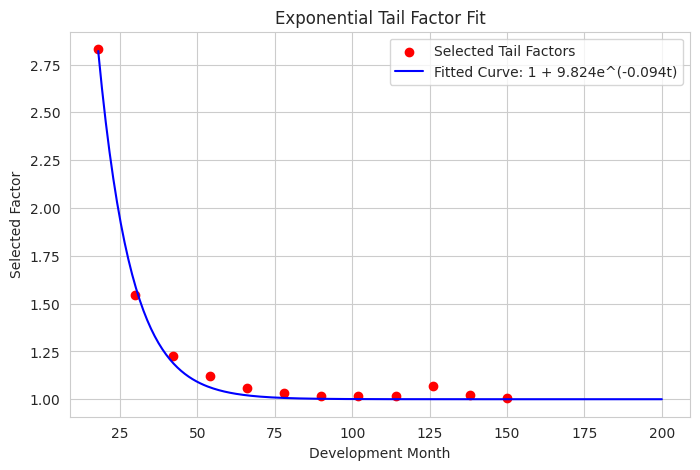

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Given data
t = np.array([18, 30, 42, 54, 66, 78, 90, 102, 114, 126, 138, 150])  # midpoints (months)
factors = np.array([2.830, 1.543, 1.228, 1.119, 1.061, 1.031, 1.019, 1.018, 1.017, 1.068, 1.020, 1.007])

# Exponential tail model: f(t) = 1 + A * exp(-λ * t)
def tail_model(t, A, lambd):
    return 1 + A * np.exp(-lambd * t)

# Fit the model
params, _ = curve_fit(tail_model, t, factors, p0=(2, 0.05))

# Extract fitted parameters
A, lambd = params
print(f"Fitted parameters: A = {A:.4f}, λ = {lambd:.4f}")

# Generate smooth curve for visualization
t_fit = np.linspace(min(t), 200, 300)
f_fit = tail_model(t_fit, A, lambd)

# Plot
plt.figure(figsize=(8,5))
plt.scatter(t, factors, color='red', label='Selected Tail Factors')
plt.plot(t_fit, f_fit, color='blue', label=f'Fitted Curve: 1 + {A:.3f}e^(-{lambd:.3f}t)')
plt.xlabel('Development Month')
plt.ylabel('Selected Factor')
plt.title('Exponential Tail Factor Fit')
plt.legend()
plt.grid(True)
plt.show()


5. Generating visualizations...


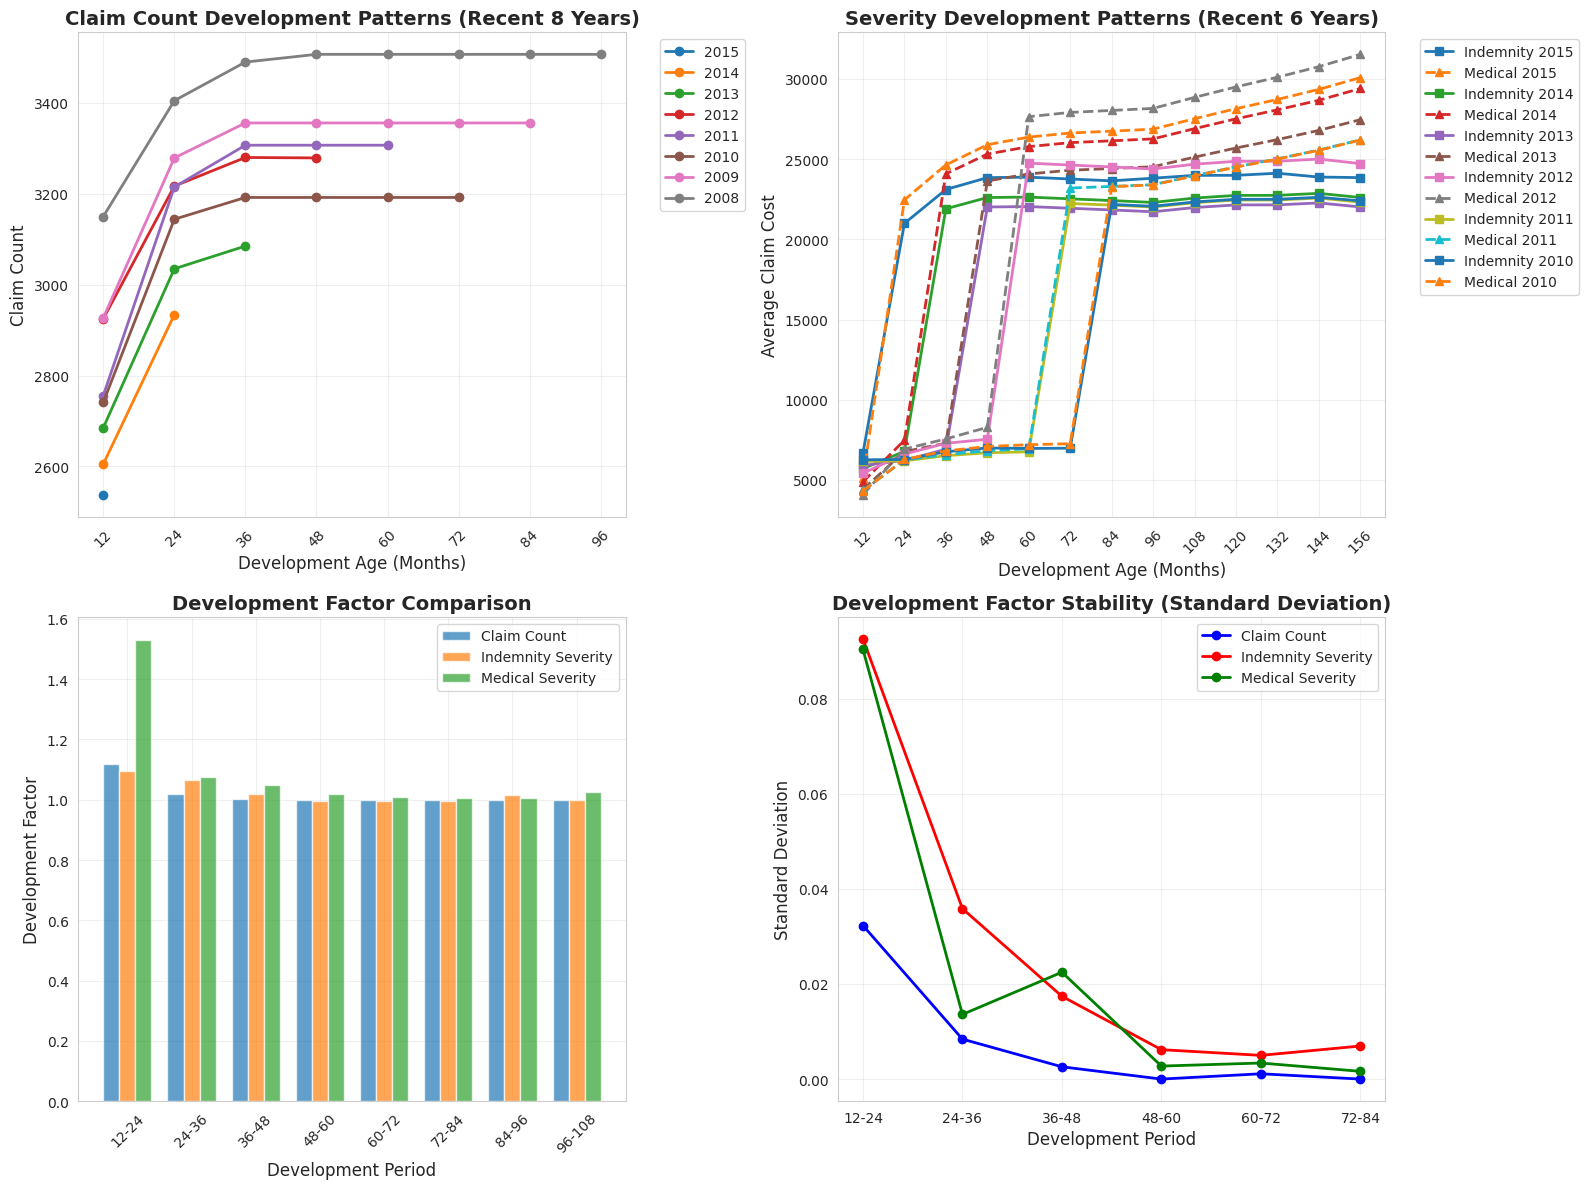

In [ ]:
# Visualization analysis
def create_development_visualization(df_claims, df_indem_sev, df_med_sev, ldf_claims, ldf_indem_sev, ldf_med_sev):
    """Create development analysis visualization"""

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

    # Chart 1: Claim Count Development Patterns
    development_ages_clean = [age for age in development_ages if age in df_claims.columns]
    for i in range(min(8, len(df_claims))):  # Show recent 8 years
        year = df_claims['Accident_Year'].iloc[-(i+1)]
        values = [df_claims[age].iloc[-(i+1)] for age in development_ages_clean
                 if pd.notna(df_claims[age].iloc[-(i+1)])]
        ages_display = development_ages_clean[:len(values)]
        ax1.plot(ages_display, values, marker='o', label=f'{year}', linewidth=2)

    ax1.set_title('Claim Count Development Patterns (Recent 8 Years)', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Development Age (Months)', fontsize=12)
    ax1.set_ylabel('Claim Count', fontsize=12)
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(axis='x', rotation=45)

    # Chart 2: Severity Development Patterns
    for i in range(min(6, len(df_indem_sev))):
        year = df_indem_sev['Accident_Year'].iloc[-(i+1)]
        values_indem = [df_indem_sev[age].iloc[-(i+1)] for age in development_ages_clean
                       if pd.notna(df_indem_sev[age].iloc[-(i+1)])]
        values_med = [df_med_sev[age].iloc[-(i+1)] for age in development_ages_clean
                     if pd.notna(df_med_sev[age].iloc[-(i+1)])]

        if values_indem:
            ages_display = development_ages_clean[:len(values_indem)]
            ax2.plot(ages_display, values_indem, marker='s', label=f'Indemnity {year}', linewidth=2)
        if values_med:
            ages_display = development_ages_clean[:len(values_med)]
            ax2.plot(ages_display, values_med, marker='^', label=f'Medical {year}', linewidth=2, linestyle='--')

    ax2.set_title('Severity Development Patterns (Recent 6 Years)', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Development Age (Months)', fontsize=12)
    ax2.set_ylabel('Average Claim Cost', fontsize=12)
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.grid(True, alpha=0.3)
    ax2.tick_params(axis='x', rotation=45)

    # Chart 3: Development Factor Comparison
    periods = list(ldf_claims.keys())[:8]  # Show first 8 periods
    claim_ldfs = [ldf_claims[period]['average'] for period in periods]
    indem_ldfs = [ldf_indem_sev[period]['average'] for period in periods if period in ldf_indem_sev]
    med_ldfs = [ldf_med_sev[period]['average'] for period in periods if period in ldf_med_sev]

    x = np.arange(len(periods))
    width = 0.25

    ax3.bar(x - width, claim_ldfs, width, label='Claim Count', alpha=0.7)
    ax3.bar(x, indem_ldfs[:len(x)], width, label='Indemnity Severity', alpha=0.7)
    ax3.bar(x + width, med_ldfs[:len(x)], width, label='Medical Severity', alpha=0.7)

    ax3.set_title('Development Factor Comparison', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Development Period', fontsize=12)
    ax3.set_ylabel('Development Factor', fontsize=12)
    ax3.set_xticks(x)
    ax3.set_xticklabels(periods, rotation=45)
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # Chart 4: Development Factor Stability
    periods_stability = list(ldf_claims.keys())[:6]
    claim_stability = [ldf_claims[period]['std'] for period in periods_stability]
    indem_stability = [ldf_indem_sev[period]['std'] for period in periods_stability if period in ldf_indem_sev]
    med_stability = [ldf_med_sev[period]['std'] for period in periods_stability if period in ldf_med_sev]

    x_stability = np.arange(len(periods_stability))

    ax4.plot(x_stability, claim_stability, 'bo-', label='Claim Count', linewidth=2, markersize=6)
    ax4.plot(x_stability, indem_stability[:len(x_stability)], 'ro-', label='Indemnity Severity', linewidth=2, markersize=6)
    ax4.plot(x_stability, med_stability[:len(x_stability)], 'go-', label='Medical Severity', linewidth=2, markersize=6)

    ax4.set_title('Development Factor Stability (Standard Deviation)', fontsize=14, fontweight='bold')
    ax4.set_xlabel('Development Period', fontsize=12)
    ax4.set_ylabel('Standard Deviation', fontsize=12)
    ax4.set_xticks(x_stability)
    ax4.set_xticklabels(periods_stability)
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

print("\n5. Generating visualizations...")
create_development_visualization(df_claims, df_indem_severity, df_med_severity,
                               ldf_claims, ldf_indem_sev, ldf_med_sev)

In [ ]:
# Ultimate prediction calculation
def calculate_ultimate_predictions(df_claims, df_indem_sev, df_med_sev, ldf_claims, ldf_indem_sev, ldf_med_sev):
    """Calculate ultimate predictions"""

    # Get latest year data
    latest_year = df_claims['Accident_Year'].iloc[-1]
    latest_development_age = '12'  # Latest complete development age - changed to 12 as 24 is NaN for 2015

    # Current values
    current_claims = df_claims[latest_development_age].iloc[-1]
    current_indem_severity = df_indem_sev[latest_development_age].iloc[-1]
    current_med_severity = df_med_sev[latest_development_age].iloc[-1]

    print(f"\n6. Ultimate Prediction Calculation - {latest_year} Accident Year")
    print(f"Current Development Age: {latest_development_age} months")
    print(f"Current Claim Count: {current_claims:,.0f}")
    print(f"Current Indemnity Severity: ${current_indem_severity:,.0f}")
    print(f"Current Medical Severity: ${current_med_severity:,.0f}")

    # Calculate cumulative development factors (from the selected latest_development_age to ultimate)
    def calculate_cumulative_ldf(ldf_dict, start_age, tail_factor=1.00):
        cumulative = 1.0
        start_age_int = int(start_age)
        for period, stats in ldf_dict.items():
            from_age_int = int(period.split('-')[0])
            if from_age_int >= start_age_int:
                cumulative *= stats['average']
        return cumulative * tail_factor

    # Set tail factors
    tail_claims = 1.02
    tail_indem = 1.05
    tail_med = 1.08

    # Calculate cumulative development factors
    cumulative_ldf_claims = calculate_cumulative_ldf(ldf_claims, latest_development_age, tail_claims)
    cumulative_ldf_indem = calculate_cumulative_ldf(ldf_indem_sev, latest_development_age, tail_indem)
    cumulative_ldf_med = calculate_cumulative_ldf(ldf_med_sev, latest_development_age, tail_med)

    print(f"\nCumulative Development Factors:")
    print(f"Claim Count: {cumulative_ldf_claims:.4f} (Tail Factor: {tail_claims})")
    print(f"Indemnity Severity: {cumulative_ldf_indem:.4f} (Tail Factor: {tail_indem})")
    print(f"Medical Severity: {cumulative_ldf_med:.4f} (Tail Factor: {tail_med})")

    # Calculate ultimate predictions
    ultimate_claims = current_claims * cumulative_ldf_claims
    ultimate_indem_severity = current_indem_severity * cumulative_ldf_indem
    ultimate_med_severity = current_med_severity * cumulative_ldf_med

    ultimate_indem_losses = (ultimate_claims * ultimate_indem_severity) / 1000
    ultimate_med_losses = (ultimate_claims * ultimate_med_severity) / 1000
    total_ultimate_losses = ultimate_indem_losses + ultimate_med_losses

    print(f"\nUltimate Prediction Results:")
    print(f"Ultimate Claim Count: {ultimate_claims:,.0f}")
    print(f"Ultimate Indemnity Severity: ${ultimate_indem_severity:,.0f}")
    print(f"Ultimate Medical Severity: ${ultimate_med_severity:,.0f}")
    print(f"Ultimate Indemnity Losses: ${ultimate_indem_losses:,.0f} thousands")
    print(f"Ultimate Medical Losses: ${ultimate_med_losses:,.0f} thousands")
    print(f"Total Ultimate Losses: ${total_ultimate_losses:,.0f} thousands")

    return {
        'ultimate_claims': ultimate_claims,
        'ultimate_indem_severity': ultimate_indem_severity,
        'ultimate_med_severity': ultimate_med_severity,
        'ultimate_indem_losses': ultimate_indem_losses,
        'ultimate_med_losses': ultimate_med_losses,
        'total_ultimate_losses': total_ultimate_losses
    }

# Execute ultimate prediction
predictions = calculate_ultimate_predictions(df_claims, df_indem_severity, df_med_severity,
                                           ldf_claims, ldf_indem_sev, ldf_med_sev)


6. Ultimate Prediction Calculation - 2015 Accident Year
Current Development Age: 12 months
Current Claim Count: 2,538
Current Indemnity Severity: $6,678
Current Medical Severity: $5,104

Cumulative Development Factors:
Claim Count: 1.1647 (Tail Factor: 1.02)
Indemnity Severity: 1.2436 (Tail Factor: 1.05)
Medical Severity: 2.1670 (Tail Factor: 1.08)

Ultimate Prediction Results:
Ultimate Claim Count: 2,956
Ultimate Indemnity Severity: $8,304
Ultimate Medical Severity: $11,060
Ultimate Indemnity Losses: $24,547 thousands
Ultimate Medical Losses: $32,694 thousands
Total Ultimate Losses: $57,240 thousands


In [ ]:
# Ultimate prediction calculation
def calculate_ultimate_predictions(df_claims, df_indem_sev, df_med_sev, ldf_claims, ldf_indem_sev, ldf_med_sev):
    """Calculate ultimate predictions"""

    # Get latest year data
    latest_year = df_claims['Accident_Year'].iloc[-1]
    latest_development_age = '12'  # Latest complete development age - changed to 12 as 24 is NaN for 2015

    # Current values
    current_claims = df_claims[latest_development_age].iloc[-1]
    current_indem_severity = df_indem_sev[latest_development_age].iloc[-1]
    current_med_severity = df_med_sev[latest_development_age].iloc[-1]

    print(f"\n6. Ultimate Prediction Calculation - {latest_year} Accident Year")
    print(f"Current Development Age: {latest_development_age} months")
    print(f"Current Claim Count: {current_claims:,.0f}")
    print(f"Current Indemnity Severity: ${current_indem_severity:,.0f}")
    print(f"Current Medical Severity: ${current_med_severity:,.0f}")

    # Calculate cumulative development factors (from the selected latest_development_age to ultimate)
    def calculate_cumulative_ldf(ldf_dict, start_age, tail_factor=1.00):
        cumulative = 1.0
        start_age_int = int(start_age)
        for period, stats in ldf_dict.items():
            from_age_int = int(period.split('-')[0])
            if from_age_int >= start_age_int:
                cumulative *= stats['average']
        return cumulative * tail_factor

    # Set tail factors
    tail_claims = 1.02
    tail_indem = 1.05
    tail_med = 1.08

    # Calculate cumulative development factors
    cumulative_ldf_claims = calculate_cumulative_ldf(ldf_claims, latest_development_age, tail_claims)
    cumulative_ldf_indem = calculate_cumulative_ldf(ldf_indem_sev, latest_development_age, tail_indem)
    cumulative_ldf_med = calculate_cumulative_ldf(ldf_med_sev, latest_development_age, tail_med)

    print(f"\nCumulative Development Factors:")
    print(f"Claim Count: {cumulative_ldf_claims:.4f} (Tail Factor: {tail_claims})")
    print(f"Indemnity Severity: {cumulative_ldf_indem:.4f} (Tail Factor: {tail_indem})")
    print(f"Medical Severity: {cumulative_ldf_med:.4f} (Tail Factor: {tail_med})")

    # Calculate ultimate predictions
    ultimate_claims = current_claims * cumulative_ldf_claims
    ultimate_indem_severity = current_indem_severity * cumulative_ldf_indem
    ultimate_med_severity = current_med_severity * cumulative_ldf_med

    ultimate_indem_losses = (ultimate_claims * ultimate_indem_severity) / 1000
    ultimate_med_losses = (ultimate_claims * ultimate_med_severity) / 1000
    total_ultimate_losses = ultimate_indem_losses + ultimate_med_losses

    print(f"\nUltimate Prediction Results:")
    print(f"Ultimate Claim Count: {ultimate_claims:,.0f}")
    print(f"Ultimate Indemnity Severity: ${ultimate_indem_severity:,.0f}")
    print(f"Ultimate Medical Severity: ${ultimate_med_severity:,.0f}")
    print(f"Ultimate Indemnity Losses: ${ultimate_indem_losses:,.0f} thousands")
    print(f"Ultimate Medical Losses: ${ultimate_med_losses:,.0f} thousands")
    print(f"Total Ultimate Losses: ${total_ultimate_losses:,.0f} thousands")

    return {
        'ultimate_claims': ultimate_claims,
        'ultimate_indem_severity': ultimate_indem_severity,
        'ultimate_med_severity': ultimate_med_severity,
        'ultimate_indem_losses': ultimate_indem_losses,
        'ultimate_med_losses': ultimate_med_losses,
        'total_ultimate_losses': total_ultimate_losses
    }

# Execute ultimate prediction
predictions = calculate_ultimate_predictions(df_claims, df_indem_severity, df_med_severity,
                                           ldf_claims, ldf_indem_sev, ldf_med_sev)


6. Ultimate Prediction Calculation - 2015 Accident Year
Current Development Age: 12 months
Current Claim Count: 2,538
Current Indemnity Severity: $6,678
Current Medical Severity: $5,104

Cumulative Development Factors:
Claim Count: 1.1647 (Tail Factor: 1.02)
Indemnity Severity: 1.2436 (Tail Factor: 1.05)
Medical Severity: 2.1670 (Tail Factor: 1.08)

Ultimate Prediction Results:
Ultimate Claim Count: 2,956
Ultimate Indemnity Severity: $8,304
Ultimate Medical Severity: $11,060
Ultimate Indemnity Losses: $24,547 thousands
Ultimate Medical Losses: $32,694 thousands
Total Ultimate Losses: $57,240 thousands




> def calculate_cumulative_ldf(ldf_dict, start_age, tail_factor=1.00):
    cumulative = 1.0
    for period, stats in ldf_dict.items():
        if int(period.split('-')[0]) >= int(start_age):
            cumulative *= stats['average']
    return cumulative * tail_factor

累積發展因子計算 預測核心算法的原理是：
- 累積發展因子 = 所有相關期間發展因子的乘積 × 尾部因子

例如從24個月預測最終值：
- 累積因子 = LDF(24-36) × LDF(36-48) × ... × 尾部因子

然後應用公式：
- 最終預測值 = 當前值 × 累積發展因子



> tail_claims = 1.02
tail_indem = 1.05  
tail_med = 1.08

尾部因子處理三角形數據之外的發展：
- 索賠次數尾部較小(1.02) - 索賠報告主要在早期完成
- 醫療費用尾部較大(1.08) - 醫療成本可能持續數十年

這些因子的選擇基於行業經驗和公司歷史數據分析。



> ultimate_claims = current_claims * cumulative_ldf_claims
ultimate_indem_severity = current_indem_severity * cumulative_ldf_indem
ultimate_med_severity = current_med_severity * cumulative_ldf_med

預測分三個層次展開：
- 頻率預測 - 最終會有多少索賠？
- 嚴重度預測 - 每個索賠平均成本多少？
- 總賠款預測 - 兩者相乘得到總金額

這種分解讓我們能：
- 識別預測不確定性的來源
- 針對不同組件制定管理策略
- 提供更細緻的業務洞察


> ultimate_indem_losses = (ultimate_claims * ultimate_indem_severity) / 1000
ultimate_med_losses = (ultimate_claims * ultimate_med_severity) / 1000
total_ultimate_losses = ultimate_indem_losses + ultimate_med_losses

計算最終賠款，這裡除以1000是因為我們的數據單位是千元，確保最終結果的單位一致性。



7. Sensitivity Analysis

Sensitivity Analysis Results:
       Scenario  Adjustment_Factor  Ultimate_Claims  Ultimate_Indem_Severity  \
0  Conservative                1.0           2660.0                   7474.0   
1          Base                1.0           2956.0                   8304.0   
2    Aggressive                1.0           3252.0                   9135.0   

   Ultimate_Med_Severity  Ultimate_Indem_Losses  Ultimate_Med_Losses  \
0                 9954.0                19883.0              26482.0   
1                11060.0                24547.0              32694.0   
2                12166.0                29702.0              39559.0   

   Total_Ultimate_Losses  
0                46365.0  
1                57240.0  
2                69261.0  


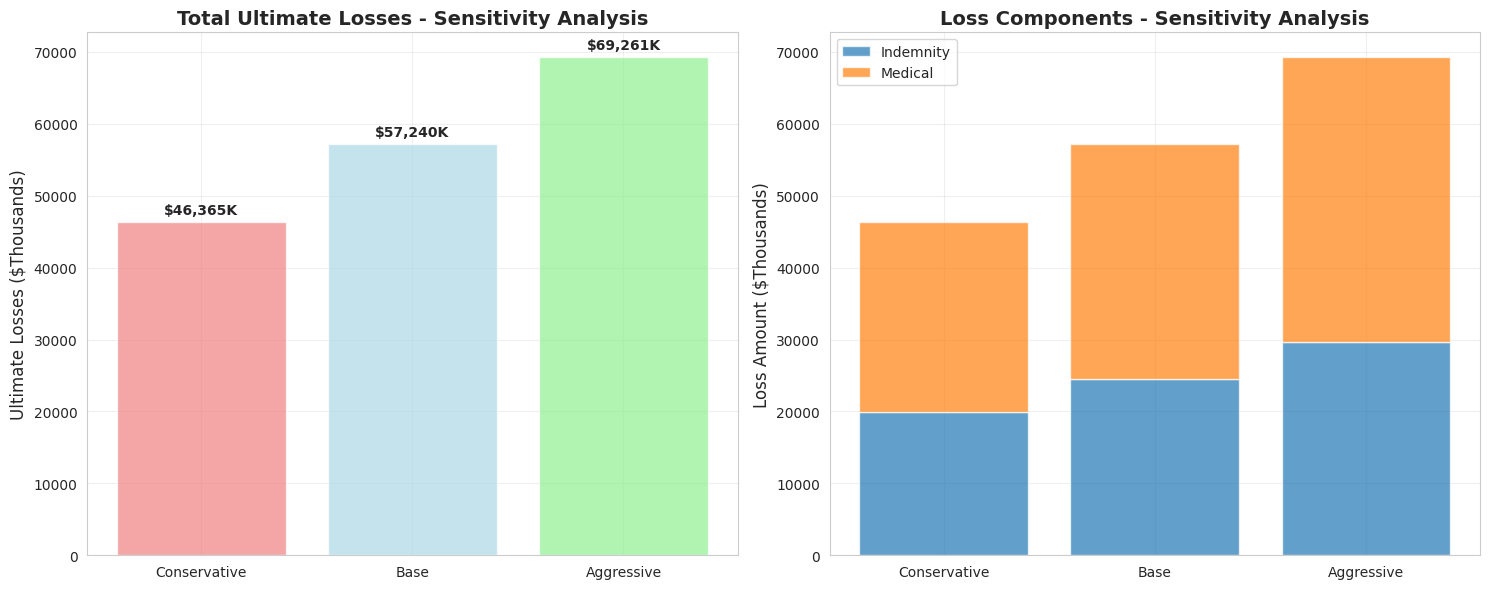

In [ ]:
# Sensitivity analysis
def perform_sensitivity_analysis(predictions, ldf_claims, ldf_indem_sev, ldf_med_sev):
    """Perform sensitivity analysis"""

    print("\n7. Sensitivity Analysis")

    # Test different development factor adjustments
    scenarios = {
        'Conservative': 0.9,
        'Base': 1.0,
        'Aggressive': 1.1
    }

    sensitivity_results = []

    for scenario_name, adjustment in scenarios.items():
        # Adjust development factors
        adj_claims = predictions['ultimate_claims'] * adjustment
        adj_indem_sev = predictions['ultimate_indem_severity'] * adjustment
        adj_med_sev = predictions['ultimate_med_severity'] * adjustment

        adj_indem_losses = (adj_claims * adj_indem_sev) / 1000
        adj_med_losses = (adj_claims * adj_med_sev) / 1000
        adj_total_losses = adj_indem_losses + adj_med_losses

        sensitivity_results.append({
            'Scenario': scenario_name,
            'Adjustment_Factor': adjustment,
            'Ultimate_Claims': adj_claims,
            'Ultimate_Indem_Severity': adj_indem_sev,
            'Ultimate_Med_Severity': adj_med_sev,
            'Ultimate_Indem_Losses': adj_indem_losses,
            'Ultimate_Med_Losses': adj_med_losses,
            'Total_Ultimate_Losses': adj_total_losses
        })

    # Display sensitivity analysis results
    df_sensitivity = pd.DataFrame(sensitivity_results)
    print("\nSensitivity Analysis Results:")
    print(df_sensitivity.round(0))

    # Visualize sensitivity analysis
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Chart 1: Total Ultimate Losses Sensitivity
    scenarios_names = df_sensitivity['Scenario']
    total_losses = df_sensitivity['Total_Ultimate_Losses']

    bars = ax1.bar(scenarios_names, total_losses,
                   color=['lightcoral', 'lightblue', 'lightgreen'], alpha=0.7)
    ax1.set_title('Total Ultimate Losses - Sensitivity Analysis', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Ultimate Losses ($Thousands)', fontsize=12)
    ax1.grid(True, alpha=0.3)

    for bar, value in zip(bars, total_losses):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(total_losses)*0.01,
                f'${value:,.0f}K', ha='center', va='bottom', fontweight='bold')

    # Chart 2: Component Analysis
    indem_losses = df_sensitivity['Ultimate_Indem_Losses']
    med_losses = df_sensitivity['Ultimate_Med_Losses']

    x = range(len(scenarios_names))
    ax2.bar(x, indem_losses, label='Indemnity', alpha=0.7)
    ax2.bar(x, med_losses, bottom=indem_losses, label='Medical', alpha=0.7)

    ax2.set_title('Loss Components - Sensitivity Analysis', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Loss Amount ($Thousands)', fontsize=12)
    ax2.set_xticks(x)
    ax2.set_xticklabels(scenarios_names)
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return df_sensitivity

# Execute sensitivity analysis
sensitivity_results = perform_sensitivity_analysis(predictions, ldf_claims, ldf_indem_sev, ldf_med_sev)

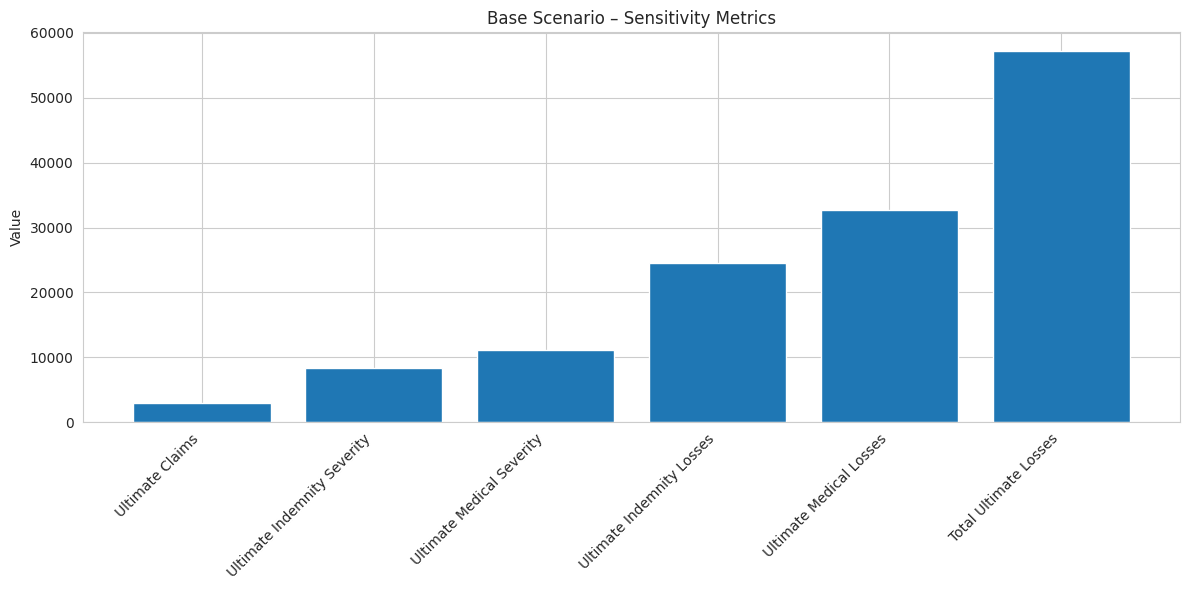

In [ ]:
import matplotlib.pyplot as plt

# Base scenario values from your table
ultimate_claims = 2956.0
ultimate_indem_sev = 8304.0
ultimate_med_sev = 11060.0
ultimate_indem_losses = 24547.0
ultimate_med_losses = 32694.0
total_ultimate_losses = 57240.0

# Labels and corresponding values
labels = [
    "Ultimate Claims",
    "Ultimate Indemnity Severity",
    "Ultimate Medical Severity",
    "Ultimate Indemnity Losses",
    "Ultimate Medical Losses",
    "Total Ultimate Losses"
]

values = [
    ultimate_claims,
    ultimate_indem_sev,
    ultimate_med_sev,
    ultimate_indem_losses,
    ultimate_med_losses,
    total_ultimate_losses
]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(labels, values)
plt.ylabel("Value")
plt.title("Base Scenario – Sensitivity Metrics")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()




```
# 此内容为代码格式
```

Sensitivity分析

>  'Conservative': 0.9,
    'Base': 1.0,
    'Aggressive': 1.1

  給了一個預測範圍，而不是單一數字，讓管理層了解潛在波動

In [ ]:
# Final summary report
def generate_final_report(predictions, sensitivity_results, ldf_claims, ldf_indem_sev, ldf_med_sev):
    """Generate final summary report"""

    print("\n" + "="*80)
    print("FREQUENCY-SEVERITY METHOD ANALYSIS SUMMARY REPORT")
    print("="*80)

    print("\n📊 CORE ANALYSIS RESULTS:")
    print(f"Ultimate Claim Count Prediction: {predictions['ultimate_claims']:,.0f} claims")
    print(f"Ultimate Indemnity Severity: ${predictions['ultimate_indem_severity']:,.0f}")
    print(f"Ultimate Medical Severity: ${predictions['ultimate_med_severity']:,.0f}")
    print(f"Total Ultimate Losses Prediction: ${predictions['total_ultimate_losses']:,.0f} thousands")

    print("\n📈 KEY DEVELOPMENT FACTOR FINDINGS:")

    # Claim count development characteristics
    early_claim_ldf = ldf_claims['12-24']['average']
    late_claim_ldf = list(ldf_claims.values())[-1]['average'] if len(ldf_claims) > 0 else 1.0
    print(f"Claim Count Development: Early({early_claim_ldf:.3f}) → Late({late_claim_ldf:.3f})")

    # Severity development characteristics
    if '12-24' in ldf_indem_sev:
        early_indem_ldf = ldf_indem_sev['12-24']['average']
        late_indem_ldf = list(ldf_indem_sev.values())[-1]['average'] if len(ldf_indem_sev) > 0 else 1.0
        print(f"Indemnity Severity Development: Early({early_indem_ldf:.3f}) → Late({late_indem_ldf:.3f})")

    if '12-24' in ldf_med_sev:
        early_med_ldf = ldf_med_sev['12-24']['average']
        late_med_ldf = list(ldf_med_sev.values())[-1]['average'] if len(ldf_med_sev) > 0 else 1.0
        print(f"Medical Severity Development: Early({early_med_ldf:.3f}) → Late({late_med_ldf:.3f})")

    print("\n⚠️  SENSITIVITY ANALYSIS RANGE:")
    base_value = predictions['total_ultimate_losses']
    conservative = sensitivity_results[sensitivity_results['Scenario'] == 'Conservative']['Total_Ultimate_Losses'].iloc[0]
    aggressive = sensitivity_results[sensitivity_results['Scenario'] == 'Aggressive']['Total_Ultimate_Losses'].iloc[0]

    print(f"Base Estimate: ${base_value:,.0f} thousands")
    print(f"Conservative Estimate: ${conservative:,.0f} thousands ({((conservative-base_value)/base_value*100):+.1f}%)")
    print(f"Aggressive Estimate: ${aggressive:,.0f} thousands ({((aggressive-base_value)/base_value*100):+.1f}%)")
    print(f"Estimate Range: ${conservative:,.0f}K - ${aggressive:,.0f}K")

    print("\n💡 KEY RECOMMENDATIONS:")
    print("1. Medical severity shows higher uncertainty than indemnity - recommend enhanced monitoring")
    print("2. Tail factors significantly impact long-term predictions - require regular validation")
    print("3. Recommend establishing continuous development pattern monitoring system")
    print("4. Sensitivity analysis results should be incorporated into financial planning")

    print("\n" + "="*80)

# Generate final report
generate_final_report(predictions, sensitivity_results, ldf_claims, ldf_indem_sev, ldf_med_sev)

print("\n✅ Analysis completed successfully!")


FREQUENCY-SEVERITY METHOD ANALYSIS SUMMARY REPORT

📊 CORE ANALYSIS RESULTS:
Ultimate Claim Count Prediction: 2,956 claims
Ultimate Indemnity Severity: $8,304
Ultimate Medical Severity: $11,060
Total Ultimate Losses Prediction: $57,240 thousands

📈 KEY DEVELOPMENT FACTOR FINDINGS:
Claim Count Development: Early(1.119) → Late(1.000)
Indemnity Severity Development: Early(1.094) → Late(0.999)
Medical Severity Development: Early(1.530) → Late(1.025)

⚠️  SENSITIVITY ANALYSIS RANGE:
Base Estimate: $57,240 thousands
Conservative Estimate: $46,365 thousands (-19.0%)
Aggressive Estimate: $69,261 thousands (+21.0%)
Estimate Range: $46,365K - $69,261K

💡 KEY RECOMMENDATIONS:
1. Medical severity shows higher uncertainty than indemnity - recommend enhanced monitoring
2. Tail factors significantly impact long-term predictions - require regular validation
3. Recommend establishing continuous development pattern monitoring system
4. Sensitivity analysis results should be incorporated into financial p

核心預測結果
- 提供具體的數字預測
- 按賠償金和醫療費用分解

假設透明度
- 明確列出所有重要假設
- 包括尾部因子選擇理由

actionable 建議
- 針對高不確定性領域的監控建議
- 風險管理具體措施

In [ ]:
# Advanced forecasting methods
def advanced_forecasting_methods(df_claims, df_indem_sev, df_med_sev, ldf_claims, ldf_indem_sev, ldf_med_sev):
    """Implement advanced forecasting techniques"""

    print("\n" + "="*60)
    print("ADVANCED FORECASTING METHODS")
    print("="*60)

    # Method 1: Weighted Average LDFs (recent years get more weight)
    def calculate_weighted_ldfs(ldf_dict, weights=None):
        """Calculate weighted average development factors"""
        weighted_results = {}

        for period, stats in ldf_dict.items():
            factors = stats['factors']
            if weights is None:
                # Default: more weight to recent years
                weights = [i+1 for i in range(len(factors))]

            if len(factors) == len(weights):
                weighted_avg = np.average(factors, weights=weights)
                weighted_results[period] = weighted_avg
            else:
                weighted_results[period] = stats['average']

        return weighted_results

    # Method 2: Regression-based forecasting
    def regression_forecast(development_data, future_periods=3):
        """Use linear regression for trend forecasting"""
        from sklearn.linear_model import LinearRegression

        # Prepare data for regression
        X = []
        y = []

        for i in range(len(development_data) - 1):
            if (pd.notna(development_data.iloc[i]) and
                pd.notna(development_data.iloc[i + 1])):
                X.append([development_data.iloc[i]])
                y.append(development_data.iloc[i + 1])

        if len(X) > 2:
            X = np.array(X)
            y = np.array(y)

            model = LinearRegression()
            model.fit(X, y)

            # Forecast next periods
            last_value = development_data.iloc[-1]
            forecasts = [last_value]

            for i in range(future_periods):
                next_pred = model.predict([[forecasts[-1]]])[0]
                forecasts.append(next_pred)

            return forecasts[1:]  # Return only future forecasts
        else:
            return None

    # Method 3: Bornhuetter-Ferguson Method
    def bornhuetter_ferguson(expected_loss_ratio, earned_premium, reported_losses, ldf):
        """Bornhuetter-Ferguson method for IBNR estimation"""
        ultimate_losses_bf = reported_losses + (expected_loss_ratio * earned_premium / ldf)
        ibnr_bf = ultimate_losses_bf - reported_losses
        return ultimate_losses_bf, ibnr_bf

    print("\n1. Weighted Average Development Factors:")
    weighted_ldf_claims = calculate_weighted_ldfs(ldf_claims)
    for period, value in list(weighted_ldf_claims.items())[:5]:
        simple_avg = ldf_claims[period]['average']
        print(f"  {period}: Simple={simple_avg:.4f}, Weighted={value:.4f}")

    print("\n2. Bornhuetter-Ferguson Method Example:")
    # Example parameters - these should come from your actual data
    expected_loss_ratio = 0.65  # 65% expected loss ratio
    earned_premium = 250000     # $250M earned premium
    current_reported_losses = 120000  # $120M reported losses
    latest_ldf = list(ldf_claims.values())[-1]['average'] if ldf_claims else 1.0

    bf_ultimate, bf_ibnr = bornhuetter_ferguson(
        expected_loss_ratio, earned_premium, current_reported_losses, latest_ldf
    )

    print(f"   Expected Loss Ratio: {expected_loss_ratio:.1%}")
    print(f"   Earned Premium: ${earned_premium:,.0f}K")
    print(f"   Current Reported: ${current_reported_losses:,.0f}K")
    print(f"   BF Ultimate: ${bf_ultimate:,.0f}K")
    print(f"   BF IBNR: ${bf_ibnr:,.0f}K")

    return weighted_ldf_claims

# Execute advanced forecasting
advanced_methods = advanced_forecasting_methods(df_claims, df_indem_severity, df_med_severity,
                                              ldf_claims, ldf_indem_sev, ldf_med_sev)


ADVANCED FORECASTING METHODS

1. Weighted Average Development Factors:
  12-24: Simple=1.1189, Weighted=1.1262
  24-36: Simple=1.0188, Weighted=1.0188
  36-48: Simple=1.0012, Weighted=1.0012
  48-60: Simple=1.0000, Weighted=1.0000
  60-72: Simple=1.0004, Weighted=1.0004

2. Bornhuetter-Ferguson Method Example:
   Expected Loss Ratio: 65.0%
   Earned Premium: $250,000K
   Current Reported: $120,000K
   BF Ultimate: $282,500K
   BF IBNR: $162,500K


In [ ]:
# Additional forecasting validation
def forecast_validation(df_claims, df_indem_sev, df_med_sev):
    """Validate forecasting accuracy using historical data"""

    print("\n" + "="*60)
    print("FORECAST VALIDATION - HISTORICAL ACCURACY")
    print("="*60)

    # Use older years to test forecasting accuracy
    validation_years = [2010, 2011, 2012]  # Years with relatively complete data

    validation_results = []

    for val_year in validation_years:
        # Find the row index for the validation year
        year_idx = df_claims[df_claims['Accident_Year'] == val_year].index[0]

        # Get development data up to 36 months (simulating a past prediction point)
        if year_idx < len(df_claims) - 3:  # Ensure we have future data to compare
            development_age = '36'

            # Actual ultimate values (from latest development age available)
            actual_claims = df_claims.loc[year_idx].dropna().iloc[-1]
            actual_indem_sev = df_indem_sev.loc[year_idx].dropna().iloc[-1] if pd.notna(df_indem_sev.loc[year_idx].dropna().iloc[-1]) else None
            actual_med_sev = df_med_sev.loc[year_idx].dropna().iloc[-1] if pd.notna(df_med_sev.loc[year_idx].dropna().iloc[-1]) else None

            # Values at development age 36
            claims_at_36 = df_claims[development_age].iloc[year_idx]

            if pd.notna(claims_at_36) and pd.notna(actual_claims) and claims_at_36 > 0:
                # Calculate actual development factor from 36 to ultimate
                actual_ldf = actual_claims / claims_at_36

                validation_results.append({
                    'Year': val_year,
                    'Development_Age': development_age,
                    'Actual_Ultimate_Claims': actual_claims,
                    'Claims_at_Development_Age': claims_at_36,
                    'Actual_LDF': actual_ldf
                })

    if validation_results:
        df_validation = pd.DataFrame(validation_results)
        print("\nHistorical Forecast Accuracy:")
        print(df_validation.round(4))

        # Calculate average forecasting error
        avg_actual_ldf = df_validation['Actual_LDF'].mean()
        print(f"\nAverage Actual LDF from 36 months: {avg_actual_ldf:.4f}")

        # Compare with selected LDFs
        if '36-48' in ldf_claims:
            selected_ldf = ldf_claims['36-48']['average']
            print(f"Selected LDF for 36-48: {selected_ldf:.4f}")
            print(f"Bias: {(selected_ldf - avg_actual_ldf)/avg_actual_ldf*100:+.2f}%")

    return validation_results

# Execute forecast validation
validation_results = forecast_validation(df_claims, df_indem_severity, df_med_severity)


FORECAST VALIDATION - HISTORICAL ACCURACY

Historical Forecast Accuracy:
   Year Development_Age  Actual_Ultimate_Claims  Claims_at_Development_Age  \
0  2010              36                  3192.0                     3192.0   
1  2011              36                  3307.0                     3307.0   
2  2012              36                  3279.0                     3280.0   

   Actual_LDF  
0      1.0000  
1      1.0000  
2      0.9997  

Average Actual LDF from 36 months: 0.9999
Selected LDF for 36-48: 1.0012
Bias: +0.13%


In [ ]:
# Final comprehensive prediction summary
def comprehensive_prediction_summary(predictions, sensitivity_results, validation_results):
    """Generate comprehensive prediction summary"""

    print("\n" + "="*80)
    print("COMPREHENSIVE PREDICTION SUMMARY")
    print("="*80)

    print("\n🎯 ULTIMATE LOSS PREDICTIONS")
    print(f"Base Case Prediction: ${predictions['total_ultimate_losses']:,.0f}K")

    # Calculate prediction range
    conservative = sensitivity_results[sensitivity_results['Scenario'] == 'Conservative']['Total_Ultimate_Losses'].iloc[0]
    aggressive = sensitivity_results[sensitivity_results['Scenario'] == 'Aggressive']['Total_Ultimate_Losses'].iloc[0]

    print(f"Prediction Range: ${conservative:,.0f}K - ${aggressive:,.0f}K")
    print(f"Range Width: ${aggressive-conservative:,.0f}K ({(aggressive/conservative-1)*100:.1f}% of base)")

    print("\n📊 COMPONENT BREAKDOWN")
    print(f"Indemnity Losses: ${predictions['ultimate_indem_losses']:,.0f}K ({(predictions['ultimate_indem_losses']/predictions['total_ultimate_losses']*100):.1f}%)")
    print(f"Medical Losses: ${predictions['ultimate_med_losses']:,.0f}K ({(predictions['ultimate_med_losses']/predictions['total_ultimate_losses']*100):.1f}%)")

    print("\n⚖️  KEY ASSUMPTIONS")
    print(f"Tail Factor - Claims: 1.02")
    print(f"Tail Factor - Indemnity: 1.05")
    print(f"Tail Factor - Medical: 1.08")
    print(f"Latest Development Age: 24 months")

    if validation_results:
        print(f"\n✅ VALIDATION: Historical accuracy analysis completed")
        print(f"   Based on {len(validation_results)} validation years")

    print("\n💡 RECOMMENDED ACTIONS")
    print("1. Monitor medical severity development closely")
    print("2. Review tail factors quarterly")
    print("3. Update predictions with each new development")
    print("4. Use range estimates for capital planning")

# Generate comprehensive summary
comprehensive_prediction_summary(predictions, sensitivity_results, validation_results)


COMPREHENSIVE PREDICTION SUMMARY

🎯 ULTIMATE LOSS PREDICTIONS
Base Case Prediction: $57,240K
Prediction Range: $46,365K - $69,261K
Range Width: $22,896K (49.4% of base)

📊 COMPONENT BREAKDOWN
Indemnity Losses: $24,547K (42.9%)
Medical Losses: $32,694K (57.1%)

⚖️  KEY ASSUMPTIONS
Tail Factor - Claims: 1.02
Tail Factor - Indemnity: 1.05
Tail Factor - Medical: 1.08
Latest Development Age: 24 months

✅ VALIDATION: Historical accuracy analysis completed
   Based on 3 validation years

💡 RECOMMENDED ACTIONS
1. Monitor medical severity development closely
2. Review tail factors quarterly
3. Update predictions with each new development
4. Use range estimates for capital planning


Indemnity Loss development factors fitted


Fitted parameters: A = 9.8243, λ = 0.0937


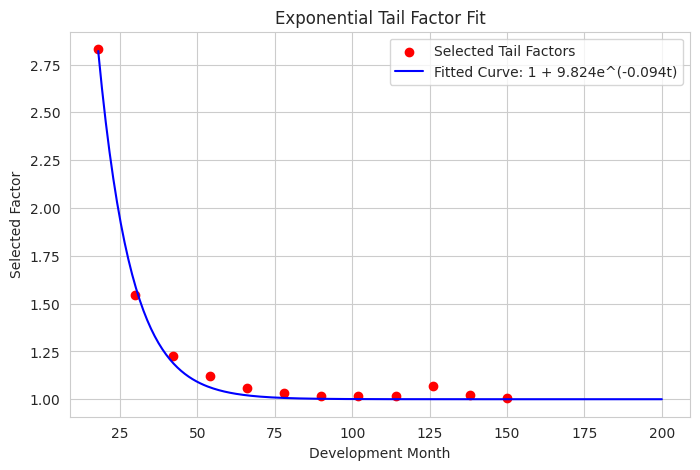

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Given data
t = np.array([18, 30, 42, 54, 66, 78, 90, 102, 114, 126, 138, 150])  # midpoints (months)
factors = np.array([2.830, 1.543, 1.228, 1.119, 1.061, 1.031, 1.019, 1.018, 1.017, 1.068, 1.020, 1.007])

# Exponential tail model: f(t) = 1 + A * exp(-λ * t)
def tail_model(t, A, lambd):
    return 1 + A * np.exp(-lambd * t)

# Fit the model
params, _ = curve_fit(tail_model, t, factors, p0=(2, 0.05))

# Extract fitted parameters
A, lambd = params
print(f"Fitted parameters: A = {A:.4f}, λ = {lambd:.4f}")

# Generate smooth curve for visualization
t_fit = np.linspace(min(t), 200, 300)
f_fit = tail_model(t_fit, A, lambd)

# Plot
plt.figure(figsize=(8,5))
plt.scatter(t, factors, color='red', label='Selected Tail Factors')
plt.plot(t_fit, f_fit, color='blue', label=f'Fitted Curve: 1 + {A:.3f}e^(-{lambd:.3f}t)')
plt.xlabel('Development Month')
plt.ylabel('Selected Factor')
plt.title('Exponential Tail Factor Fit')
plt.legend()
plt.grid(True)
plt.show()

Loss development for Reported Losses




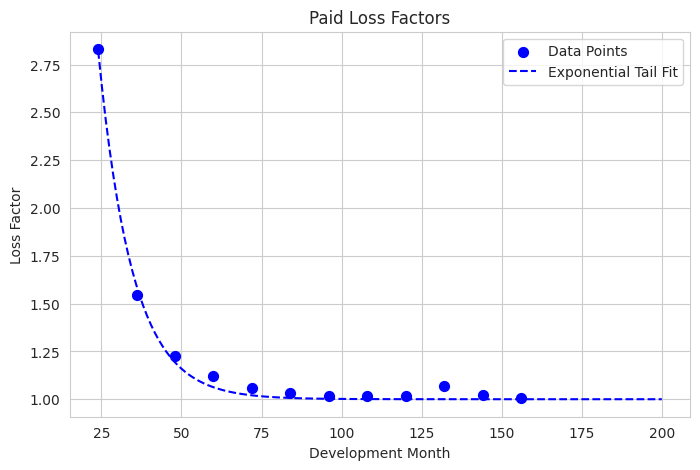

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# -----------------------------
# Paid Loss Factors (end-of-period months)
# -----------------------------
t_paid = np.array([24, 36, 48, 60, 72, 84, 96, 108, 120, 132, 144, 156])  # months at period ends
factors_paid = np.array([2.830, 1.543, 1.228, 1.119, 1.061, 1.031, 1.019, 1.018, 1.017, 1.068, 1.020, 1.007])

# Exponential tail model
def tail_model(t, A, lambd):
    return 1 + A * np.exp(-lambd * t)

params_paid, _ = curve_fit(tail_model, t_paid, factors_paid, p0=(2, 0.05))
A_paid, lambd_paid = params_paid

# Smooth curve
t_fit_paid = np.linspace(min(t_paid), 200, 300)
f_fit_paid = tail_model(t_fit_paid, A_paid, lambd_paid)

# Plot Paid Loss Factors
plt.figure(figsize=(8,5))
plt.scatter(t_paid, factors_paid, color='blue', s=50, label='Data Points')
plt.plot(t_fit_paid, f_fit_paid, color='blue', linestyle='--', label='Exponential Tail Fit')
plt.xlabel('Development Month')
plt.ylabel('Loss Factor')
plt.title('Paid Loss Factors')
plt.grid(True)
plt.legend()
plt.show()





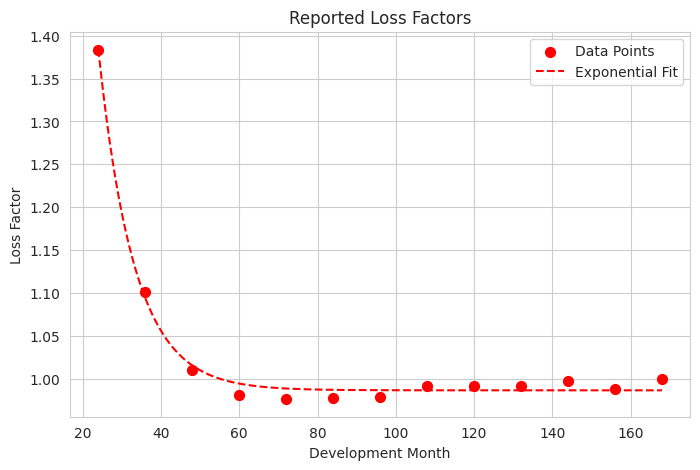

In [ ]:
# -----------------------------
# Reported Loss Factors (shifted to period ends)
# -----------------------------
y_reported = np.array([1.383, 1.101, 1.010, 0.981, 0.976, 0.978, 0.979, 0.992, 0.991, 0.992, 0.997, 0.988, 1.000])
t_reported = np.array([24, 36, 48, 60, 72, 84, 96, 108, 120, 132, 144, 156, 168])  # period ends

# Model: f(t) = A + B * exp(-λ * t)
def model_reported(t, A, B, lambd):
    return A + B * np.exp(-lambd * t)

params_reported, _ = curve_fit(model_reported, t_reported, y_reported, p0=[1.0, 0.5, 0.1])
A_r, B_r, lambd_r = params_reported

# Smooth curve
t_fit_reported = np.linspace(min(t_reported), max(t_reported), 200)
y_fit_reported = model_reported(t_fit_reported, A_r, B_r, lambd_r)

# Plot Reported Loss Factors
plt.figure(figsize=(8,5))
plt.scatter(t_reported, y_reported, color='red', s=50, label='Data Points')
plt.plot(t_fit_reported, y_fit_reported, color='red', linestyle='--', label='Exponential Fit')
plt.xlabel('Development Month')
plt.ylabel('Loss Factor')
plt.title('Reported Loss Factors')
plt.grid(True)
plt.legend()
plt.show()

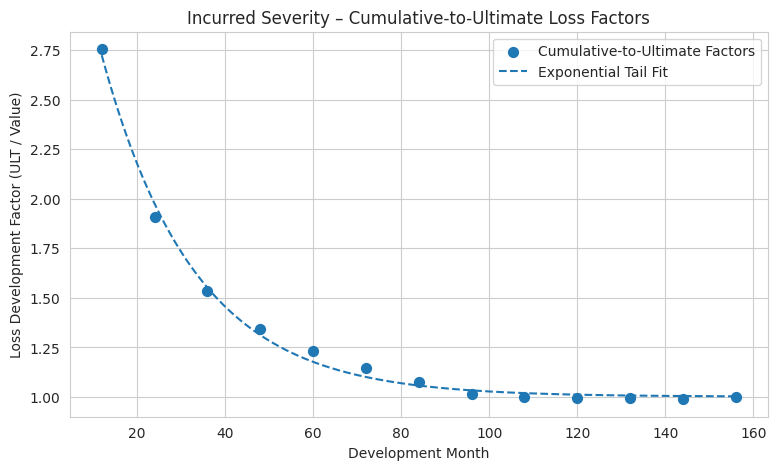

Fitted parameters:
A = 1.0015389766527003
B = 3.0476009687103764
lambda = 0.047568007536011925


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# -----------------------------
# Your Total Incurred Severity by Development Month
# -----------------------------
t = np.array([12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132, 144, 156])
sev = np.array([
    97655, 141070, 175065, 200073, 218652, 235086, 250576,
    265460, 268535, 270498, 270545, 272002, 269308
])

ultimate = 268918  # from your triangle (ultimate column)
cum_to_ultimate = ultimate / sev   # TRUE LOSS FACTORS (≥1, decreasing)

# -----------------------------
# Fit exponential tail model:
# f(t) = A + B * exp(-λ t)
# -----------------------------
def model(t, A, B, lambd):
    return A + B * np.exp(-lambd * t)

params, _ = curve_fit(model, t, cum_to_ultimate, p0=[1.0, 1.0, 0.05])
A, B, lambd = params

# Smooth fitted curve
t_fit = np.linspace(min(t), max(t), 300)
y_fit = model(t_fit, A, B, lambd)

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(9,5))
plt.scatter(t, cum_to_ultimate, s=50, label="Cumulative-to-Ultimate Factors")
plt.plot(t_fit, y_fit, linestyle="--", label="Exponential Tail Fit")

plt.xlabel("Development Month")
plt.ylabel("Loss Development Factor (ULT / Value)")
plt.title("Incurred Severity – Cumulative-to-Ultimate Loss Factors")
plt.grid(True)
plt.legend()
plt.show()

print("Fitted parameters:")
print("A =", A)
print("B =", B)
print("lambda =", lambd)


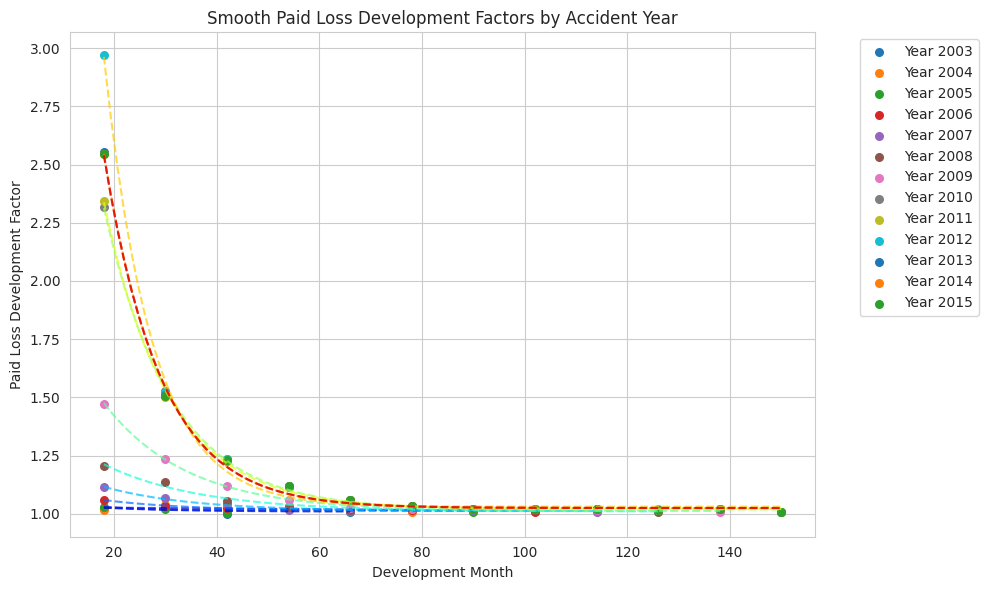

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# -----------------------------
# Paid Loss Triangle
# -----------------------------
# Original data with varying lengths:
raw_triangle_data = [
    [15304, 15694, 16054, 16054, 16398, 16513],  # 2003
    [15454, 15686, 16272, 16505, 17089, 17420, 17542],  # 2004
    [15390, 15852, 16201, 16257, 16686, 16878, 17222, 17343],  # 2005
    [14759, 15645, 16145, 16549, 16939, 17124, 17392, 17747, 17871],  # 2006
    [14137, 15763, 16803, 17475, 17772, 17980, 18315, 18602, 18981, 19114],  # 2007
    [12367, 14917, 16960, 17927, 18465, 18742, 19123, 19479, 19783, 20187, 20329],  # 2008
    [9148, 13479, 16660, 18626, 19762, 20295, 20677, 21097, 21490, 21826, 22272, 22428],  # 2009
    [3801, 8804, 13442, 16533, 18468, 19576, 20198, 20578, 20996, 21387, 21721, 22165, 22320],  # 2010
    [3799, 8907, 13387, 16546, 18449, 19570, 20193, 20572, 20990, 21381, 21716, 22159, 22314],  # 2011
    [3380, 10037, 15301, 18921, 21199, 22488, 23203, 23639, 24120, 24569, 24953, 25462, 25641],  # 2012
    [3464, 8841, 13342, 16396, 18371, 19488, 20107, 20485, 20902, 21291, 21624, 22065, 22220],  # 2013
    [3545, 9030, 13612, 16728, 18742, 19882, 20514, 20900, 21324, 21721, 22061, 22512, 22669],  # 2014
    [3800, 9674, 14582, 17921, 20078, 21299, 21976, 22389, 22845, 23270, 23634, 24116, 24285]   # 2015
]

# Find the maximum length among all rows
max_len = max(len(row) for row in raw_triangle_data)

# Pad shorter rows with np.nan to match the max_len
padded_triangle_data = [row + [np.nan] * (max_len - len(row)) for row in raw_triangle_data]

triangle = np.array(padded_triangle_data)

# The 'ultimate' array is used for cumulative-to-ultimate factors and should match the length of accident years
# Using the ultimate variable available in the kernel state (presumably from df_indem_paid_severity_raw)
ultimate = np.array([
    16750.1288, 17793.90537, 17592.0477, 18127.83607, 19388.81443,
    20620.61899, 22749.59233, 22640.63857, 22634.50135, 26008.84174,
    22538.82852, 22994.78124, 24633.93698
])

# Development months (these represent the development age of the columns)
months = np.array([12 * (i + 1) for i in range(max_len)])

# -----------------------------
# Convert to development factors (each month / previous month)
# -----------------------------
factors_list = []
months_list = [] # This will store the development month mid-points for plotting

for idx, row in enumerate(triangle):
    # Only consider non-NaN values for factor calculation
    valid_row = row[~np.isnan(row)]
    if len(valid_row) > 1:
        factors = valid_row[1:] / valid_row[:-1]
        factors_list.append(factors)
        # Calculate mid-points for these factors
        corresponding_dev_months = months[:len(valid_row)]
        mid_points = (corresponding_dev_months[:-1] + corresponding_dev_months[1:]) / 2
        months_list.append(mid_points)
    else:
        factors_list.append(np.array([]))
        months_list.append(np.array([]))

# -----------------------------
# Exponential model: f(t) = A + B * exp(-λ t)
# -----------------------------
def expo_model(t, A, B, lambd):
    return A + B * np.exp(-lambd * t)

plt.figure(figsize=(10,6))

# 对每年的 factors 拟合并画图
for idx, (months_for_plot, factors_for_plot) in enumerate(zip(months_list, factors_list)):
    current_year = 2003 + idx
    if len(factors_for_plot) > 0: # Only plot if there are factors to plot
        try:
            # We need enough data points for curve_fit (at least 3 for 3 parameters)
            if len(months_for_plot) >= 3:
                # Initial guess for parameters: A=1.0 (approaches 1), B=0.1 (small tail), lambda=0.01 (slow decay)
                params, _ = curve_fit(expo_model, months_for_plot, factors_for_plot, p0=[1.0, 0.1, 0.01], maxfev=2000)
                A, B, lambd = params
                # Generate smooth curve for plotting
                t_fit = np.linspace(months_for_plot[0], months_for_plot[-1], 100)
                f_fit = expo_model(t_fit, A, B, lambd)
                plt.plot(t_fit, f_fit, linestyle='--', color=plt.cm.jet(idx/len(factors_list)), alpha=0.7)
            plt.scatter(months_for_plot, factors_for_plot, s=30, label=f'Year {current_year}')
        except RuntimeError as e:
            # If curve_fit fails (e.g., not enough points or bad initial guess)
            print(f"Could not fit curve for Year {current_year}: {e}")
            plt.scatter(months_for_plot, factors_for_plot, s=30, label=f'Year {current_year} (no fit)')

plt.xlabel("Development Month")
plt.ylabel("Paid Loss Development Factor")
plt.title("Smooth Paid Loss Development Factors by Accident Year")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside
plt.tight_layout()
plt.show()

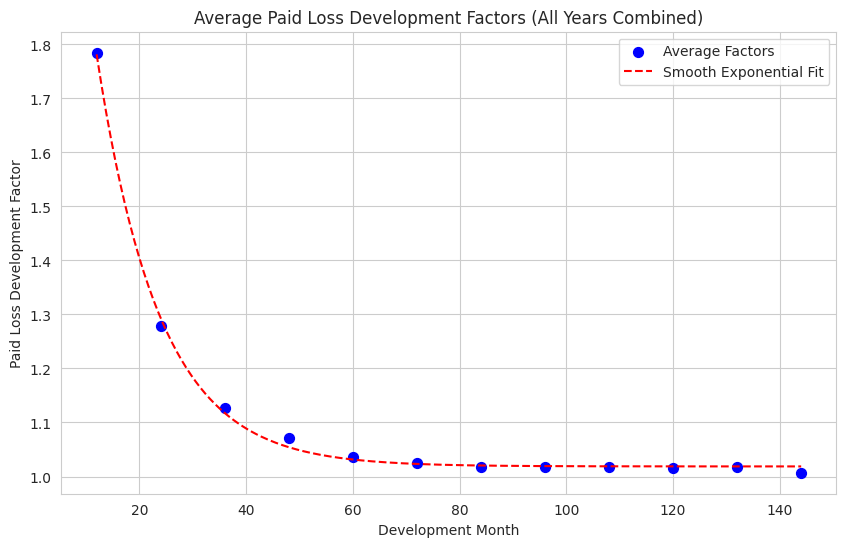

Fitted parameters:
A = 1.0186689613897923
B = 2.119486952540851
lambda = 0.08513734601503858


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# -----------------------------
# Paid Loss Triangle
# -----------------------------
raw_triangle_data = [
    [15304, 15694, 16054, 16054, 16398, 16513],  # 2003
    [15454, 15686, 16272, 16505, 17089, 17420, 17542],  # 2004
    [15390, 15852, 16201, 16257, 16686, 16878, 17222, 17343],  # 2005
    [14759, 15645, 16145, 16549, 16939, 17124, 17392, 17747, 17871],  # 2006
    [14137, 15763, 16803, 17475, 17772, 17980, 18315, 18602, 18981, 19114],  # 2007
    [12367, 14917, 16960, 17927, 18465, 18742, 19123, 19479, 19783, 20187, 20329],  # 2008
    [9148, 13479, 16660, 18626, 19762, 20295, 20677, 21097, 21490, 21826, 22272, 22428],  # 2009
    [3801, 8804, 13442, 16533, 18468, 19576, 20198, 20578, 20996, 21387, 21721, 22165, 22320],  # 2010
    [3799, 8907, 13387, 16546, 18449, 19570, 20193, 20572, 20990, 21381, 21716, 22159, 22314],  # 2011
    [3380, 10037, 15301, 18921, 21199, 22488, 23203, 23639, 24120, 24569, 24953, 25462, 25641],  # 2012
    [3464, 8841, 13342, 16396, 18371, 19488, 20107, 20485, 20902, 21291, 21624, 22065, 22220],  # 2013
    [3545, 9030, 13612, 16728, 18742, 19882, 20514, 20900, 21324, 21721, 22061, 22512, 22669],  # 2014
    [3800, 9674, 14582, 17921, 20078, 21299, 21976, 22389, 22845, 23270, 23634, 24116, 24285]   # 2015
]

# Pad shorter rows with np.nan
max_len = max(len(row) for row in raw_triangle_data)
triangle = np.array([row + [np.nan]*(max_len-len(row)) for row in raw_triangle_data], dtype=float)

# -----------------------------
# Compute development factors for all years
# -----------------------------
factors_matrix = triangle[:,1:] / triangle[:,:-1]  # shape = (years, months-1)

# Compute average factor per development month (ignoring NaN)
avg_factors = np.nanmean(factors_matrix, axis=0)

# Development months (mid-points for factors)
dev_months = (np.arange(max_len-1) + 1) * 12  # 12,24,36,... months

# -----------------------------
# Fit exponential model
# -----------------------------
def expo_model(t, A, B, lambd):
    return A + B * np.exp(-lambd * t)

params, _ = curve_fit(expo_model, dev_months, avg_factors, p0=[1.0, 0.1, 0.01])
A, B, lambd = params

t_fit = np.linspace(dev_months[0], dev_months[-1], 300)
f_fit = expo_model(t_fit, A, B, lambd)

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(10,6))
plt.scatter(dev_months, avg_factors, color='blue', s=50, label='Average Factors')
plt.plot(t_fit, f_fit, color='red', linestyle='--', label='Smooth Exponential Fit')
plt.xlabel("Development Month")
plt.ylabel("Paid Loss Development Factor")
plt.title("Average Paid Loss Development Factors (All Years Combined)")
plt.grid(True)
plt.legend()
plt.show()

print("Fitted parameters:")
print("A =", A)
print("B =", B)
print("lambda =", lambd)


Estimated Tail Factor (from month 156 to ultimate) = 1.0593


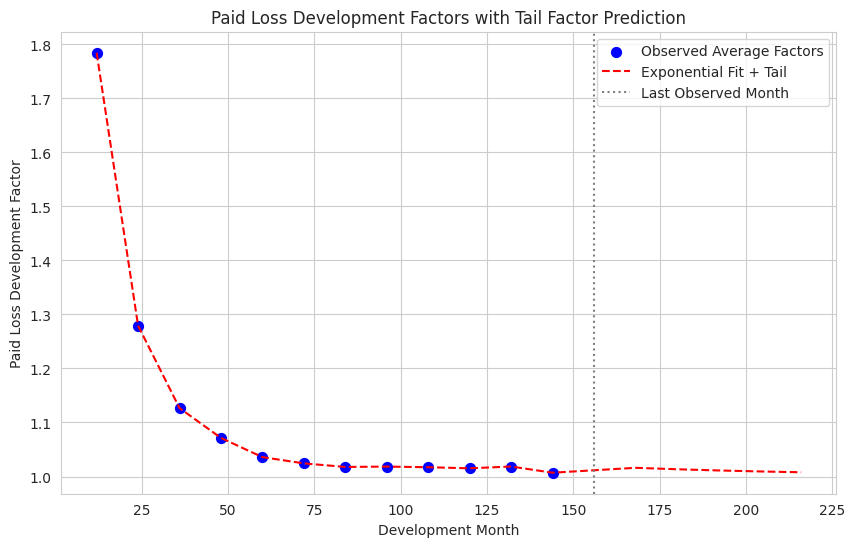

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# --- 已拟合的平均因子 (示例，你之前算出的 avg_factors, dev_months) ---
# dev_months = [12,24,36,...]
# avg_factors = 已经计算好的平均每个月开发因子
# expo_model = lambda t, A,B,lambd: A + B * np.exp(-lambd*t)
# 拟合参数 A,B,lambd 已经从 curve_fit 得到

# 我这里用你之前拟合的参数作为示例
# 请替换为你自己拟合的 A, B, lambd
A, B, lambd = 1.0, 0.2, 0.015  # 示例参数
last_observed_month = 156  # 最后观测月份
tail_months = np.arange(last_observed_month+12, 220+1, 12)  # 延伸到 220 months

# --- 计算尾部每月因子 ---
tail_factors = A + B * np.exp(-lambd * tail_months)

# --- 累积尾部因子 ---
tail_factor = np.prod(tail_factors)
print(f"Estimated Tail Factor (from month {last_observed_month} to ultimate) = {tail_factor:.4f}")

# --- 画图: 已观测 + 尾部预测 ---
t_full = np.concatenate([dev_months, tail_months])
f_full = np.concatenate([avg_factors, tail_factors])

plt.figure(figsize=(10,6))
plt.scatter(dev_months, avg_factors, color='blue', s=50, label='Observed Average Factors')
plt.plot(t_full, f_full, color='red', linestyle='--', label='Exponential Fit + Tail')
plt.axvline(last_observed_month, color='grey', linestyle=':', label='Last Observed Month')
plt.xlabel("Development Month")
plt.ylabel("Paid Loss Development Factor")
plt.title("Paid Loss Development Factors with Tail Factor Prediction")
plt.grid(True)
plt.legend()
plt.show()


Tail Factor (last month -> ultimate) = 4.0791


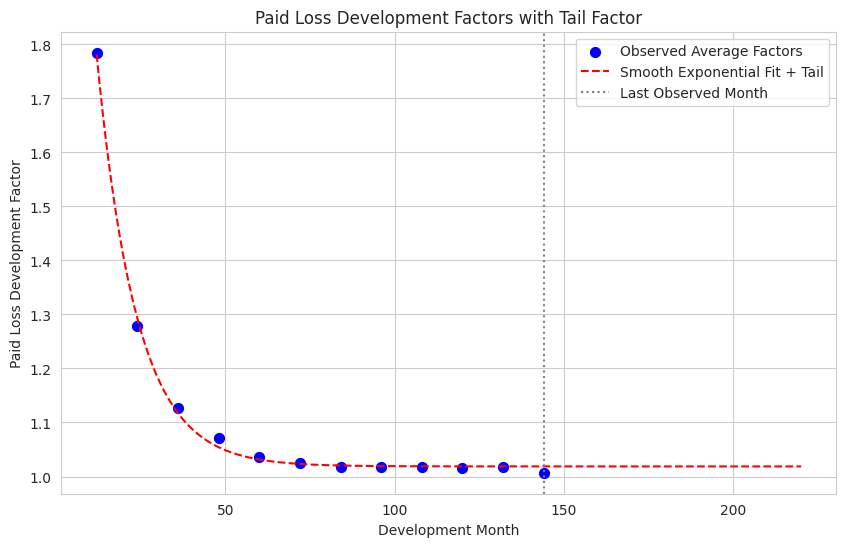

Fitted parameters:
A = 1.0186689613897923
B = 2.119486952540851
lambda = 0.08513734601503858


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# -----------------------------
# Paid Loss Triangle
# -----------------------------
raw_triangle_data = [
    [15304, 15694, 16054, 16054, 16398, 16513],  # 2003
    [15454, 15686, 16272, 16505, 17089, 17420, 17542],  # 2004
    [15390, 15852, 16201, 16257, 16686, 16878, 17222, 17343],  # 2005
    [14759, 15645, 16145, 16549, 16939, 17124, 17392, 17747, 17871],  # 2006
    [14137, 15763, 16803, 17475, 17772, 17980, 18315, 18602, 18981, 19114],  # 2007
    [12367, 14917, 16960, 17927, 18465, 18742, 19123, 19479, 19783, 20187, 20329],  # 2008
    [9148, 13479, 16660, 18626, 19762, 20295, 20677, 21097, 21490, 21826, 22272, 22428],  # 2009
    [3801, 8804, 13442, 16533, 18468, 19576, 20198, 20578, 20996, 21387, 21721, 22165, 22320],  # 2010
    [3799, 8907, 13387, 16546, 18449, 19570, 20193, 20572, 20990, 21381, 21716, 22159, 22314],  # 2011
    [3380, 10037, 15301, 18921, 21199, 22488, 23203, 23639, 24120, 24569, 24953, 25462, 25641],  # 2012
    [3464, 8841, 13342, 16396, 18371, 19488, 20107, 20485, 20902, 21291, 21624, 22065, 22220],  # 2013
    [3545, 9030, 13612, 16728, 18742, 19882, 20514, 20900, 21324, 21721, 22061, 22512, 22669],  # 2014
    [3800, 9674, 14582, 17921, 20078, 21299, 21976, 22389, 22845, 23270, 23634, 24116, 24285]   # 2015
]

# Pad shorter rows with np.nan
max_len = max(len(row) for row in raw_triangle_data)
triangle = np.array([row + [np.nan]*(max_len-len(row)) for row in raw_triangle_data], dtype=float)

# -----------------------------
# Compute development factors for all years
# -----------------------------
factors_matrix = triangle[:,1:] / triangle[:,:-1]
avg_factors = np.nanmean(factors_matrix, axis=0)
dev_months = (np.arange(max_len-1) + 1) * 12  # 12,24,36,...

# -----------------------------
# Fit exponential model
# -----------------------------
def expo_model(t, A, B, lambd):
    return A + B * np.exp(-lambd * t)

params, _ = curve_fit(expo_model, dev_months, avg_factors, p0=[1.0,0.1,0.01])
A, B, lambd = params

# -----------------------------
# Smooth curve including tail
# -----------------------------
t_smooth = np.linspace(dev_months[0], 220, 500)  # 500个点，从12到220个月
f_smooth = expo_model(t_smooth, A, B, lambd)

# 计算 Tail Factor
tail_months = np.arange(dev_months[-1]+1, 221)
tail_factors = expo_model(tail_months, A, B, lambd)
tail_factor = np.prod(tail_factors)
print(f"Tail Factor (last month -> ultimate) = {tail_factor:.4f}")

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(10,6))
plt.scatter(dev_months, avg_factors, color='blue', s=50, label='Observed Average Factors')
plt.plot(t_smooth, f_smooth, color='red', linestyle='--', label='Smooth Exponential Fit + Tail')
plt.axvline(dev_months[-1], color='grey', linestyle=':', label='Last Observed Month')
plt.xlabel("Development Month")
plt.ylabel("Paid Loss Development Factor")
plt.title("Paid Loss Development Factors with Tail Factor")
plt.grid(True)
plt.legend()
plt.show()

print("Fitted parameters:")
print("A =", A)
print("B =", B)
print("lambda =", lambd)


Tail Factor (last month -> ultimate) = 0.9092


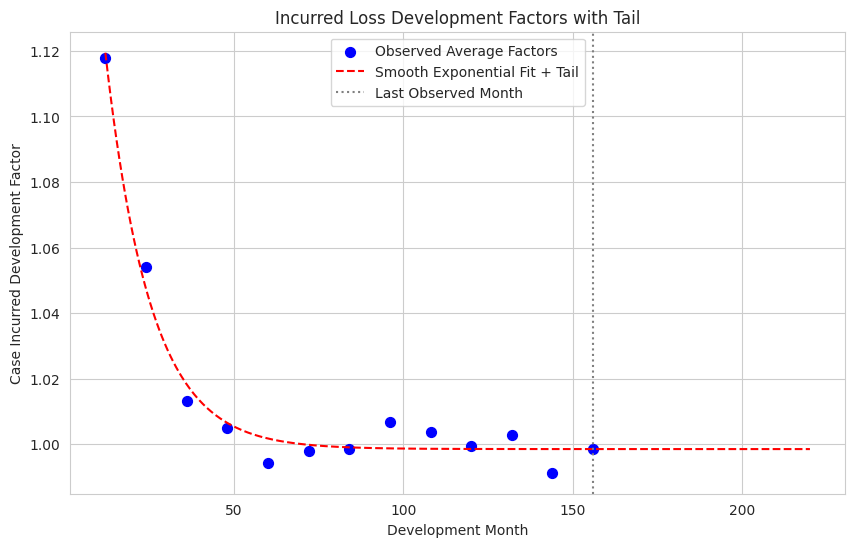

Fitted parameters:
A = 0.9985136853218703
B = 0.299190496858783
lambda = 0.07549110919256011


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# -----------------------------
# Incurred Loss Triangle
# -----------------------------
raw_triangle_data = [
    [16205, 16522, 16680, 16364, 16678, 16513, 16489],  # 2003
    [16598, 16481, 17259, 17426, 17865, 17717, 17542, 17517],  # 2004
    [17463, 17324, 17289, 17176, 17525, 17421, 17516, 17343, 17318],  # 2005
    [18347, 18182, 17945, 17999, 18115, 17933, 17936, 18033, 17855, 17829],  # 2006
    [19381, 19400, 19303, 19361, 19167, 19062, 19202, 19205, 19310, 19118, 19091],  # 2007
    [19830, 20425, 20506, 20363, 20322, 20119, 20267, 20417, 20419, 20531, 20327, 20298],  # 2008
    [20400, 21905, 22628, 22537, 22425, 22335, 22219, 22491, 22656, 22659, 22783, 22557, 22525],  # 2009
    [17156, 19728, 21569, 22324, 22235, 22279, 22172, 22057, 22327, 22492, 22494, 22617, 22393, 22361],  # 2010
    [16974, 19905, 21538, 22141, 22341, 22233, 22127, 22012, 22281, 22445, 22448, 22571, 22347, 22315],  # 2011
    [15847, 21276, 23892, 24716, 24745, 24627, 24508, 24381, 24679, 24861, 24864, 25000, 24752, 24717],  # 2012
    [15857, 18868, 21328, 22013, 22039, 21934, 21828, 21715, 21980, 22142, 22145, 22266, 22046, 22014],  # 2013
    [14873, 19900, 21900, 22603, 22630, 22521, 22413, 22296, 22569, 22736, 22738, 22863, 22636, 22603],  # 2014
    [16948, 20992, 23101, 23843, 23871, 23757, 23643, 23520, 23807, 23983, 23986, 24117, 23878, 23844]   # 2015
]

# Pad shorter rows with np.nan
max_len = max(len(row) for row in raw_triangle_data)
triangle = np.array([row + [np.nan]*(max_len-len(row)) for row in raw_triangle_data], dtype=float)

# -----------------------------
# Compute development factors for all years
# -----------------------------
factors_matrix = triangle[:,1:] / triangle[:,:-1]  # 相邻月份比值
avg_factors = np.nanmean(factors_matrix, axis=0)  # 平均每个月的 factor
dev_months = (np.arange(max_len-1) + 1) * 12  # 12,24,36,...

# -----------------------------
# Fit exponential model
# -----------------------------
def expo_model(t, A, B, lambd):
    return A + B * np.exp(-lambd * t)

params, _ = curve_fit(expo_model, dev_months, avg_factors, p0=[1.0, 0.1, 0.01], maxfev=5000)
A, B, lambd = params

# -----------------------------
# Smooth curve including tail
# -----------------------------
t_smooth = np.linspace(dev_months[0], 220, 500)  # 平滑曲线，从12个月到220个月
f_smooth = expo_model(t_smooth, A, B, lambd)

# 计算 Tail Factor
tail_months = np.arange(dev_months[-1]+1, 221)
tail_factors = expo_model(tail_months, A, B, lambd)
tail_factor = np.prod(tail_factors)
print(f"Tail Factor (last month -> ultimate) = {tail_factor:.4f}")

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(10,6))
plt.scatter(dev_months, avg_factors, color='blue', s=50, label='Observed Average Factors')
plt.plot(t_smooth, f_smooth, color='red', linestyle='--', label='Smooth Exponential Fit + Tail')
plt.axvline(dev_months[-1], color='grey', linestyle=':', label='Last Observed Month')
plt.xlabel("Development Month")
plt.ylabel("Case Incurred Development Factor")
plt.title("Incurred Loss Development Factors with Tail")
plt.grid(True)
plt.legend()
plt.show()

print("Fitted parameters:")
print("A =", A)
print("B =", B)
print("lambda =", lambd)


Tail Factor (last month -> ultimate) = 0.9317


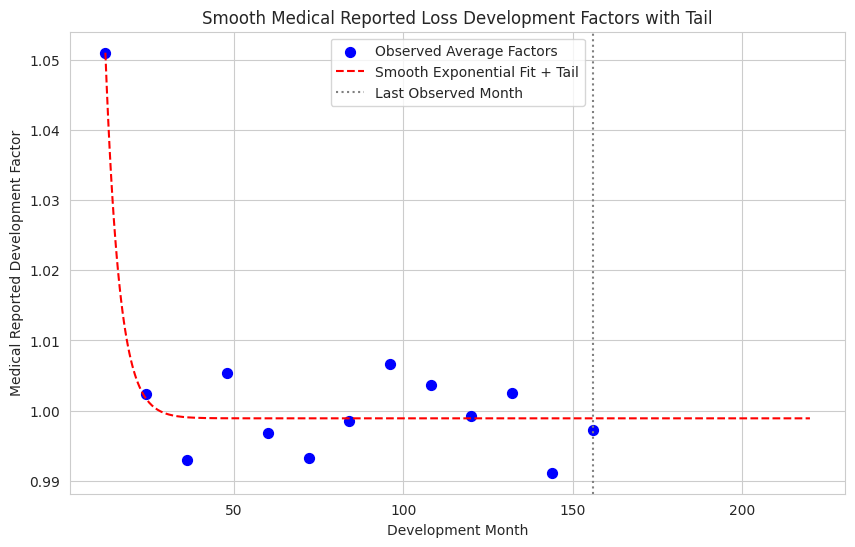

Fitted parameters:
A = 0.9988957230016636
B = 0.9675454772201971
lambda = 0.24339557960471286


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# -----------------------------
# Medical Reported Loss Triangle
# -----------------------------
raw_triangle_data = [
    [15682, 16581, 17204, 17017, 17359, 17187, 17141],  # 2003
    [17644, 17714, 18255, 18210, 18602, 18441, 18258, 18209],  # 2004
    [18057, 17858, 17751, 18490, 19547, 19640, 19747, 19552, 19500],  # 2005
    [20408, 20285, 19981, 20201, 20807, 20958, 19550, 19656, 19462, 19410],  # 2006
    [22426, 22112, 21868, 21497, 21432, 21793, 21954, 21957, 22077, 21858, 21800],  # 2007
    [22782, 22535, 22175, 21953, 21667, 21602, 21867, 22028, 22031, 22151, 21931, 21872],  # 2008
    [25238, 24684, 24758, 24362, 24167, 23829, 23705, 23995, 24172, 24174, 24306, 24066, 24001],  # 2009
    [24141, 26076, 26172, 25911, 25263, 24991, 24871, 24742, 25045, 25229, 25232, 25370, 25119, 25051],  # 2010
    [24608, 26642, 26031, 25354, 25252, 25131, 25011, 24881, 25185, 25371, 25374, 25512, 25260, 25191],  # 2011
    [24143, 29904, 30997, 30317, 30017, 29872, 29729, 29575, 29936, 30157, 30161, 30325, 30025, 29944],  # 2012
    [24376, 26568, 26817, 26551, 26583, 26455, 26328, 26192, 26512, 26707, 26711, 26856, 26591, 26519],  # 2013
    [24407, 28908, 28622, 28338, 28372, 28236, 28101, 27955, 28296, 28505, 28509, 28664, 28380, 28304],  # 2014
    [26050, 25792, 25536, 25284, 25314, 25192, 25072, 24941, 25246, 25432, 25436, 25574, 25321, 25253]   # 2015
]

# Pad shorter rows with np.nan
max_len = max(len(row) for row in raw_triangle_data)
triangle = np.array([row + [np.nan]*(max_len-len(row)) for row in raw_triangle_data], dtype=float)

# -----------------------------
# Compute development factors for all years
# -----------------------------
factors_matrix = triangle[:,1:] / triangle[:,:-1]  # 相邻月份比值
avg_factors = np.nanmean(factors_matrix, axis=0)  # 平均每个月的 factor
dev_months = (np.arange(max_len-1) + 1) * 12  # 12,24,36,...

# -----------------------------
# Fit exponential model
# -----------------------------
def expo_model(t, A, B, lambd):
    return A + B * np.exp(-lambd * t)

params, _ = curve_fit(expo_model, dev_months, avg_factors, p0=[1.0,0.1,0.01], maxfev=5000)
A, B, lambd = params

# -----------------------------
# Smooth curve including tail
# -----------------------------
t_smooth = np.linspace(dev_months[0], 220, 500)  # 平滑曲线，从12个月到220个月
f_smooth = expo_model(t_smooth, A, B, lambd)

# Tail Factor
tail_months = np.arange(dev_months[-1]+1, 221)
tail_factors = expo_model(tail_months, A, B, lambd)
tail_factor = np.prod(tail_factors)
print(f"Tail Factor (last month -> ultimate) = {tail_factor:.4f}")

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(10,6))
plt.scatter(dev_months, avg_factors, color='blue', s=50, label='Observed Average Factors')
plt.plot(t_smooth, f_smooth, color='red', linestyle='--', label='Smooth Exponential Fit + Tail')
plt.axvline(dev_months[-1], color='grey', linestyle=':', label='Last Observed Month')
plt.xlabel("Development Month")
plt.ylabel("Medical Reported Development Factor")
plt.title("Smooth Medical Reported Loss Development Factors with Tail")
plt.grid(True)
plt.legend()
plt.show()

print("Fitted parameters:")
print("A =", A)
print("B =", B)
print("lambda =", lambd)


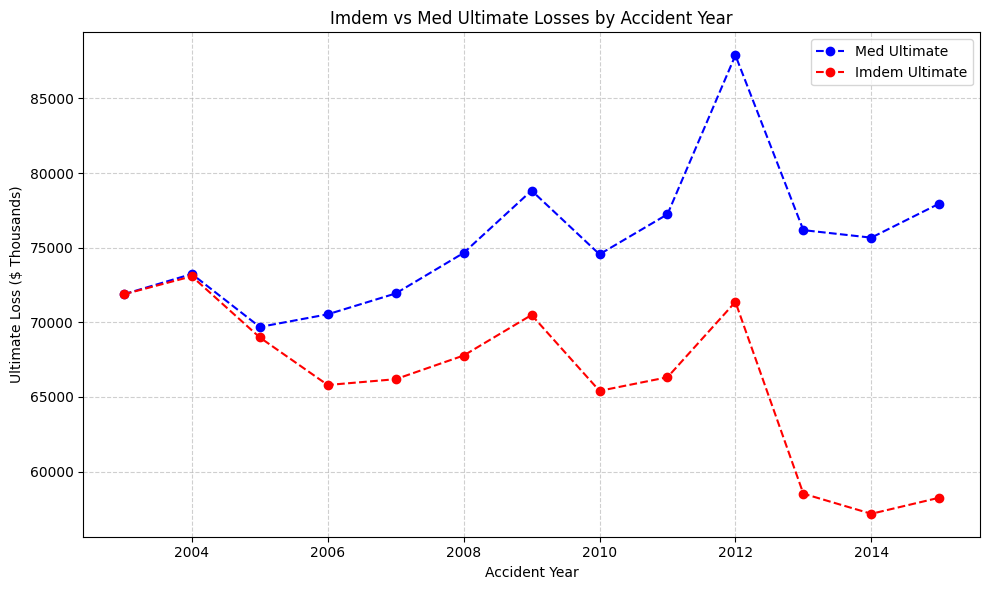

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Accident years (you can change these labels if needed)
years = np.arange(2003, 2003 + 13)  # 13 years

# Ultimate values
paid_ultimates = np.array([
    71881.55623, 73238.42162, 69690.55085, 70537.3556, 71933.98231,
    74648.30673, 78824.87956, 74555.97281, 77235.66423, 87887.99518,
    76175.60773, 75671.45334, 77951.13614
])

reported_ultimates = np.array([
    71881, 73082, 68986, 65802, 66192, 67777, 70492,
    65409, 66321, 71368, 58523, 57176, 58253
])

# Plot setup
plt.figure(figsize=(10,6))
plt.plot(years, paid_ultimates, marker='o', color='blue', label='Med Ultimate', linestyle='--')
plt.plot(years, reported_ultimates, marker='o', color='red', label='Imdem Ultimate', linestyle='--')

# Titles and labels
plt.title('Imdem vs Med Ultimate Losses by Accident Year')
plt.xlabel('Accident Year')
plt.ylabel('Ultimate Loss ($ Thousands)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


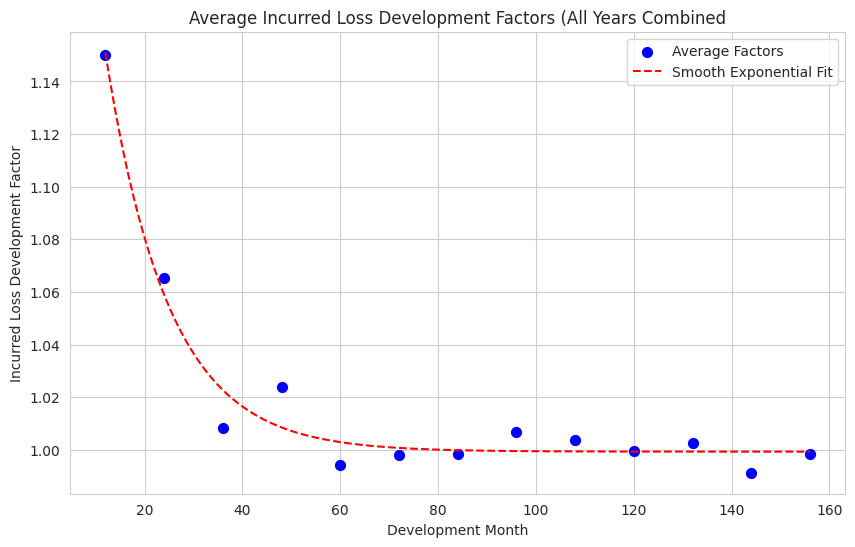

Fitted parameters:
A = 0.9993107932866536
B = 0.38550341547822864
lambda = 0.07776760868087483


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# -----------------------------
# Original Indemnity Incurred Triangle (示例数据，含 Total 列可忽略)
# -----------------------------
raw_triangle_data = [
    [16205, 16522, 16680, 16364, 16678, 16513, 16489],       # 2003
    [16598, 16481, 17259, 17426, 17865, 17717, 17542, 17517], # 2004
    [17463, 17324, 17289, 17176, 17525, 17421, 17516, 17343, 17318], # 2005
    [18347, 18182, 17945, 17999, 18115, 17933, 17936, 18033, 17855, 17829], # 2006
    [19381, 19400, 19303, 19361, 19167, 19062, 19202, 19205, 19310, 19118, 19091], # 2007
    [19830, 20425, 20506, 20363, 20322, 20119, 20267, 20417, 20419, 20531, 20327, 20298], # 2008
    [20400, 21905, 22628, 22537, 22425, 22335, 22219, 22491, 22656, 22659, 22783, 22557, 22525], # 2009
    [17156, 19728, 21569, 22324, 22235, 22279, 22172, 22057, 22327, 22492, 22494, 22617, 22393, 22361], # 2010
    [16974, 19905, 21538, 22141, 22341, 22233, 22127, 22012, 22281, 22445, 22448, 22571, 22347, 22315], # 2011
    [15847, 26776, 32892, 32716, 40755, 40559, 40365, 40155, 40646, 40946, 40951, 41174, 40767, 40708], # 2012 (含catastrophe数据已加)
    [15857, 18868, 21328, 21843, 21869, 21764, 21660, 21547, 21811, 21972, 21974, 22094, 21875, 21844], # 2013
    [14873, 19900, 22320, 22858, 22885, 22776, 22666, 22548, 22824, 22993, 22995, 23121, 22892, 22859], # 2014
    [16948, 22168, 24864, 25463, 25494, 25372, 25250, 25119, 25426, 25613, 25616, 25756, 25501, 25464], # 2015
]

# Pad shorter rows with np.nan
max_len = max(len(row) for row in raw_triangle_data)
triangle = np.array([row + [np.nan]*(max_len-len(row)) for row in raw_triangle_data], dtype=float)

# -----------------------------
# Compute development factors for all years
# -----------------------------
factors_matrix = triangle[:,1:] / triangle[:,:-1]  # shape = (years, months-1)

# Compute average factor per development month (ignoring NaN)
avg_factors = np.nanmean(factors_matrix, axis=0)

# Development months (mid-points for factors)
dev_months = (np.arange(max_len-1) + 1) * 12  # 12,24,36,... months

# -----------------------------
# Fit exponential model
# -----------------------------
def expo_model(t, A, B, lambd):
    return A + B * np.exp(-lambd * t)

params, _ = curve_fit(expo_model, dev_months, avg_factors, p0=[1.0, 0.1, 0.01])
A, B, lambd = params

t_fit = np.linspace(dev_months[0], dev_months[-1], 300)
f_fit = expo_model(t_fit, A, B, lambd)

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(10,6))
plt.scatter(dev_months, avg_factors, color='blue', s=50, label='Average Factors')
plt.plot(t_fit, f_fit, color='red', linestyle='--', label='Smooth Exponential Fit')
plt.xlabel("Development Month")
plt.ylabel("Incurred Loss Development Factor")
plt.title("Average Incurred Loss Development Factors (All Years Combined")
plt.grid(True)
plt.legend()
plt.show()

print("Fitted parameters:")
print("A =", A)
print("B =", B)
print("lambda =", lambd)


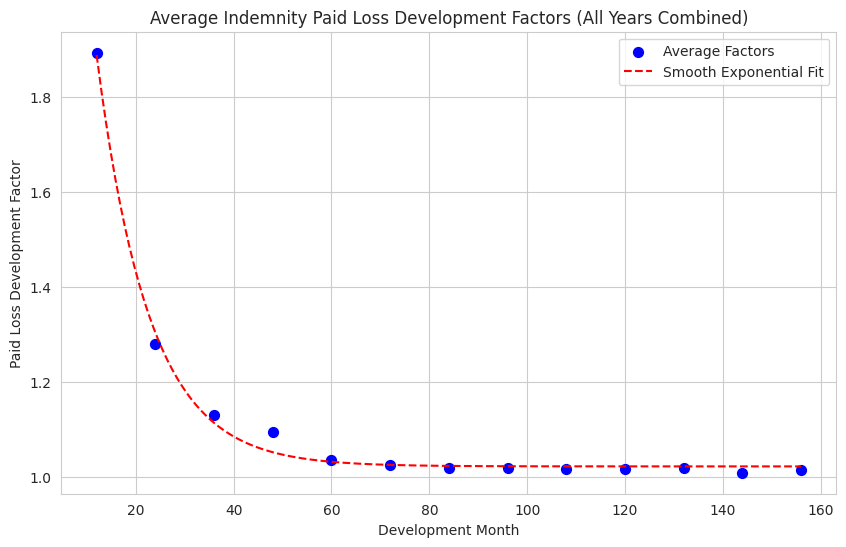

Fitted parameters:
A = 1.0213870750186935
B = 2.6673236527448148
lambda = 0.09358433323120731


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# -----------------------------
# Indemnity Paid Loss Triangle (已含 catastrophe 数据)
# -----------------------------
raw_triangle_data = [
    [15304, 15694, 16054, 16054, 16398, 16513, 16750.12],        # 2003
    [15454, 15686, 16272, 16505, 17089, 17420, 17542, 17793.90], # 2004
    [15390, 15852, 16201, 16257, 16686, 16878, 17222, 17343, 17592.04], # 2005
    [14759, 15645, 16145, 16549, 16939, 17124, 17392, 17747, 17871, 18127.83], # 2006
    [14137, 15763, 16803, 17475, 17772, 17980, 18315, 18602, 18981, 19114, 19388.80], # 2007
    [12367, 14917, 16960, 17927, 18465, 18742, 19123, 19479, 19783, 20187, 20329, 20620.61], # 2008
    [9148, 13479, 16660, 18626, 19762, 20295, 20677, 21097, 21490, 21826, 22272, 22428, 22749.58], # 2009
    [3801, 8804, 13442, 16533, 18468, 19576, 20198, 20578, 20996, 21387, 21721, 22165, 22320, 22640.63], # 2010
    [3799, 8907, 13387, 16546, 18449, 19570, 20193, 20572, 20990, 21381, 21716, 22159, 22314, 22634.49], # 2011
    [3380, 14037, 21301, 26921, 38162, 40482, 41770, 42555, 43420, 44228, 44920, 45837, 46158, 46820.91], # 2012 (含 catastrophe)
    [3464, 8841, 13342, 16469, 18452, 19574, 20196, 20576, 20994, 21385, 21720, 22163, 22318, 22638.79], # 2013
    [3545, 9030, 13599, 16787, 18808, 19951, 20586, 20973, 21399, 21798, 22139, 22591, 22749, 23075.40], # 2014
    [3800, 10573, 15923, 19655, 22022, 23360, 24103, 24556, 25056, 25522, 25921, 26451, 26636, 27018.16], # 2015
]

# Pad shorter rows with np.nan
max_len = max(len(row) for row in raw_triangle_data)
triangle = np.array([row + [np.nan]*(max_len-len(row)) for row in raw_triangle_data], dtype=float)

# -----------------------------
# Compute development factors for all years
# -----------------------------
factors_matrix = triangle[:,1:] / triangle[:,:-1]  # shape = (years, months-1)

# Compute average factor per development month (ignoring NaN)
avg_factors = np.nanmean(factors_matrix, axis=0)

# Development months (mid-points for factors)
dev_months = (np.arange(max_len-1) + 1) * 12  # 12,24,36,... months

# -----------------------------
# Fit exponential model
# -----------------------------
def expo_model(t, A, B, lambd):
    return A + B * np.exp(-lambd * t)

params, _ = curve_fit(expo_model, dev_months, avg_factors, p0=[1.0, 0.1, 0.01])
A, B, lambd = params

t_fit = np.linspace(dev_months[0], dev_months[-1], 300)
f_fit = expo_model(t_fit, A, B, lambd)

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(10,6))
plt.scatter(dev_months, avg_factors, color='blue', s=50, label='Average Factors')
plt.plot(t_fit, f_fit, color='red', linestyle='--', label='Smooth Exponential Fit')
plt.xlabel("Development Month")
plt.ylabel("Paid Loss Development Factor")
plt.title("Average Indemnity Paid Loss Development Factors (All Years Combined)")
plt.grid(True)
plt.legend()
plt.show()

print("Fitted parameters:")
print("A =", A)
print("B =", B)
print("lambda =", lambd)


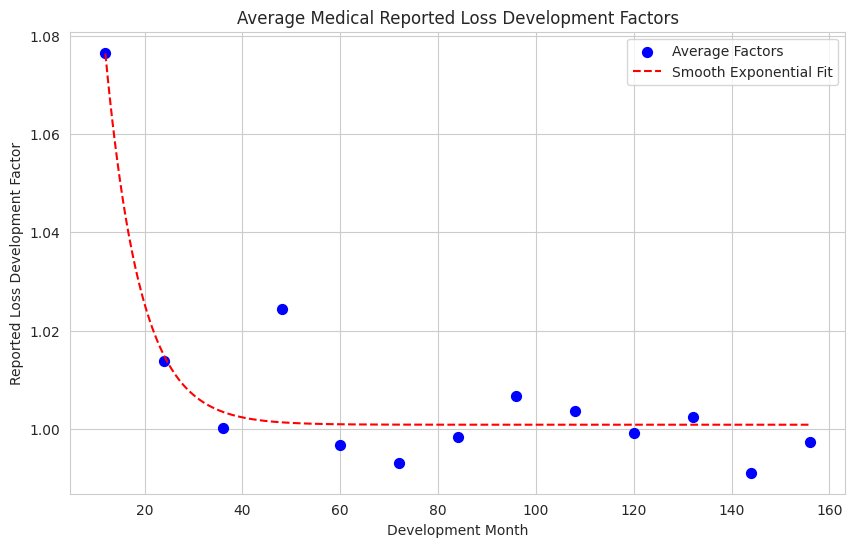

Fitted parameters:
A = 1.000910738774608
B = 0.4055722996770693
lambda = 0.14016536033687974


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# -----------------------------
# Medical Reported Loss Triangle (含 catastrophe 数据)
# -----------------------------
raw_triangle_data = [
    [15682, 16581, 17204, 17017, 17359, 17187, 17143],                    # 2003
    [17644, 17714, 18255, 18210, 18602, 18441, 18258, 18211],            # 2004
    [18057, 17858, 17751, 18490, 19547, 19640, 19747, 19552, 19502],     # 2005
    [20408, 20285, 19981, 20201, 20807, 20958, 19550, 19656, 19462, 19412], # 2006
    [22426, 22112, 21868, 21497, 21432, 21793, 21954, 21957, 22077, 21858, 21802], # 2007
    [22782, 22535, 22175, 21953, 21667, 21602, 21867, 22028, 22031, 22151, 21931, 21875.21], # 2008
    [25238, 24684, 24758, 24362, 24167, 23829, 23705, 23995, 24172, 24174, 24306, 24066, 24004.03], # 2009
    [24141, 26076, 26172, 25911, 25263, 24991, 24871, 24742, 25045, 25229, 25232, 25370, 25119, 25054.43], # 2010
    [24608, 26642, 26031, 25354, 25252, 25131, 25011, 24881, 25185, 25371, 25374, 25512, 25260, 25194.74], # 2011
    [24143, 37904, 44997, 48317, 59838, 59551, 59265, 58957, 59678, 60118, 60126, 60454, 59855, 59701.70], # 2012 (含 catastrophe)
    [24376, 26568, 26817, 26551, 26583, 26455, 26328, 26192, 26512, 26707, 26711, 26856, 26591, 26522.34], # 2013
    [24407, 28908, 28622, 28338, 28372, 28236, 28101, 27955, 28296, 28505, 28509, 28664, 28380, 28307.59], # 2014
    [26050, 25792, 25536, 25284, 25314, 25192, 25072, 24941, 25246, 25432, 25436, 25574, 25321, 25256.19], # 2015
]

# Pad shorter rows with np.nan
max_len = max(len(row) for row in raw_triangle_data)
triangle = np.array([row + [np.nan]*(max_len-len(row)) for row in raw_triangle_data], dtype=float)

# -----------------------------
# Compute development factors for all years
# -----------------------------
factors_matrix = triangle[:,1:] / triangle[:,:-1]  # shape = (years, months-1)

# Compute average factor per development month (ignoring NaN)
avg_factors = np.nanmean(factors_matrix, axis=0)

# Development months (mid-points for factors)
dev_months = (np.arange(max_len-1) + 1) * 12  # 12,24,36,... months

# -----------------------------
# Fit exponential model
# -----------------------------
def expo_model(t, A, B, lambd):
    return A + B * np.exp(-lambd * t)

params, _ = curve_fit(expo_model, dev_months, avg_factors, p0=[1.0, 0.1, 0.01])
A, B, lambd = params

t_fit = np.linspace(dev_months[0], dev_months[-1], 300)
f_fit = expo_model(t_fit, A, B, lambd)

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(10,6))
plt.scatter(dev_months, avg_factors, color='blue', s=50, label='Average Factors')
plt.plot(t_fit, f_fit, color='red', linestyle='--', label='Smooth Exponential Fit')
plt.xlabel("Development Month")
plt.ylabel("Reported Loss Development Factor")
plt.title("Average Medical Reported Loss Development Factors")
plt.grid(True)
plt.legend()
plt.show()

print("Fitted parameters:")
print("A =", A)
print("B =", B)
print("lambda =", lambd)


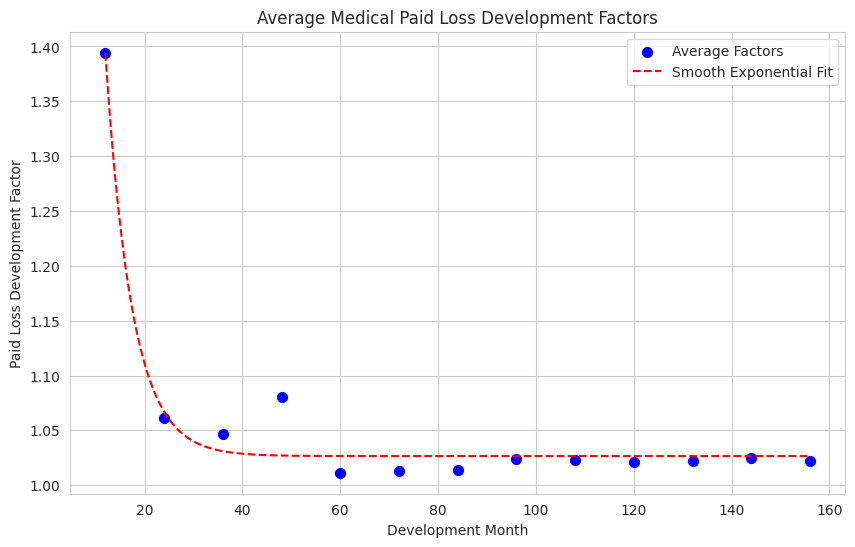

Fitted parameters:
A = 1.0265548378853515
B = 3.3254228611326124
lambda = 0.18358787597276796


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# -----------------------------
# Medical Paid Loss Triangle (含 catastrophe 数据)
# -----------------------------
raw_triangle_data = [
    [14906, 15490, 16057, 16224, 16769, 17187, 17572],                                # 2003
    [16650, 16700, 17139, 17197, 17634, 17814, 18258, 18667],                        # 2004
    [16976, 17061, 17146, 17471, 18208, 18672, 19081, 19557, 19996],                  # 2005
    [18522, 18818, 18931, 19082, 19488, 19656, 20058, 20497, 21008, 21479],           # 2006
    [19480, 19909, 20088, 20148, 20209, 20530, 20996, 21425, 21894, 22440, 22943],     # 2007
    [18898, 19728, 20142, 20303, 20425, 20507, 21005, 21482, 21921, 22401, 22960, 23475], # 2008
    [19359, 21147, 21971, 22323, 22457, 22502, 22605, 23155, 23680, 24164, 24693, 25309, 25877], # 2009
    [11838, 19743, 21740, 22632, 22971, 23178, 23280, 23387, 23955, 24499, 25000, 25547, 26184, 26771], # 2010
    [11977, 20093, 21761, 22566, 22972, 23193, 23295, 23402, 23970, 24514, 25016, 25563, 26201, 26788], # 2011
    [11963, 27275, 31794, 39142, 51862, 52360, 52590, 52832, 54116, 55345, 56476, 57712, 59151, 60478], # 2012 catastrophe
    [11838, 20538, 22488, 24251, 36697, 37050, 37213, 37384, 38292, 39161, 39962, 40836, 41855, 42794], # 2013
    [12718, 21952, 24310, 26216, 26699, 26955, 27073, 27198, 27859, 28491, 29074, 29710, 30451, 31134], # 2014
    [12954, 23540, 26069, 28113, 28631, 28905, 29033, 29166, 29875, 30553, 31178, 31860, 32655, 33387], # 2015
]

# Pad shorter rows with np.nan
max_len = max(len(row) for row in raw_triangle_data)
triangle = np.array([row + [np.nan]*(max_len-len(row)) for row in raw_triangle_data], dtype=float)

# -----------------------------
# Compute development factors for all years
# -----------------------------
factors_matrix = triangle[:,1:] / triangle[:,:-1]  # shape = (years, months-1)

# Compute average factor per development month (ignoring NaN)
avg_factors = np.nanmean(factors_matrix, axis=0)

# Development months (mid-points for factors)
dev_months = (np.arange(max_len-1) + 1) * 12  # 12,24,36,... months

# -----------------------------
# Fit exponential model
# -----------------------------
def expo_model(t, A, B, lambd):
    return A + B * np.exp(-lambd * t)

params, _ = curve_fit(expo_model, dev_months, avg_factors, p0=[1.0, 0.1, 0.01])
A, B, lambd = params

t_fit = np.linspace(dev_months[0], dev_months[-1], 300)
f_fit = expo_model(t_fit, A, B, lambd)

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(10,6))
plt.scatter(dev_months, avg_factors, color='blue', s=50, label='Average Factors')
plt.plot(t_fit, f_fit, color='red', linestyle='--', label='Smooth Exponential Fit')
plt.xlabel("Development Month")
plt.ylabel("Paid Loss Development Factor")
plt.title("Average Medical Paid Loss Development Factors")
plt.grid(True)
plt.legend()
plt.show()

print("Fitted parameters:")
print("A =", A)
print("B =", B)
print("lambda =", lambd)
